 <div id="Portada" style="border-style: double; color:#4472C4;">
    <h1 style="text-align: center;font-size: 35px">Estadística aplicada a la minería</h1>
    <p style="text-align: center; border-bottom: 2px solid #4472C4; border-spacing: 5px; margin-bottom: 100px"></p>
    <img src="escudo.png">
    <h3 style="margin: auto; font-size: 16px; margin-left:10px">Nombre:</h3>
    <p style="color:black; margin:auto; font-size: 14px; margin-left:10px">Terán Miranda Luis Ángel</p>
    
</div>

 <div id="Indice" style="border-style: double; color:#4472C4;">
    <p style="margin: auto; font-size: 26px; margin-left:10px; text-align: center; margin-top: 25px;margin-bottom:20px">Índice</p>
    <ol>
        <li><a href=#AE>Análisis exploratorio</a></li>
        <ol>
            <li><a href=#AE>Análisis exploratorio</a></li>
            <li><a href=#Formato>Formato de los datos</a></li>
            <li><a href=#Limpieza>Limpieza de datos</a></li>
            <li><a href=#Histogramas>Histogramas</a></li>
            <li><a href=#valores>Valores más altos</a></li>
            <li><a href=#Boxplots>Boxplots</a></li>
        </ol>
        <li><a href=#AM>Análisis multivariable</a></li>
        <ol>
            <li><a href=#Scatter>Scatter plot de elementos</a></li>
            <li><a href=#Mcov>Matriz de covarianza</a></li>
            <li><a href=#Mcorr>Matriz de correlación</a></li>
        </ol>
        <li><a href=#AES>Análisis espacial</a></li>
        <ol>
            <li><a href=#Semivariograma>Semivariograma</a></li>
            <li><a href=#CP>Componentes Principales</a></li>
            <li><a href=#clust>Clustering</a></li>           
        </ol>
        <li><a href=#conc>Conclusiones finales</a></li>
    </ol>
    <p style="margin-bottom:50px"></p>
</div>


En el presente trabajo se realiza una clasificación litólogica de unidades de acuerdo a su composición química, obteniendo como resultado un mapa de la distribución espacial de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
#Se lee el archivo de datos
datos = pd.read_csv('Geochem_dataset_P2.csv')

<h1 style="text-align: center; font-size: 35px">Análisis exploratorio</h1><a name='AE'/>

# Formato de los datos <a name='Formato'/>

In [3]:
#Se muestra la tabla de datos original
datos.head()

,Unnamed: 0,Unnamed: 1,Recvd Wt.,Au,Ag,Al,As,B,Ba,Be,...,Sc,Sr,Th,Ti,Tl,U,V,W,Zn,Unnamed: 39
0,NORTE,ESTE,kg,ppb,ppm,%,ppm,ppm,ppm,ppm,...,ppm,ppm,ppm,%,ppm,ppm,ppm,ppm,ppm,NaN
1,4627001,549050,2.78,19,1.6,3.71,4,<10,60,<0.5,...,12,11,<20,0.01,<10,<10,155,<10,139,NaN
2,4627049,549003,3.32,5,0.3,5.13,<2,<10,40,<0.5,...,28,5,<20,0.01,<10,<10,240,<10,280,NaN
3,4627073,548963,2.76,17,0.6,1.39,10,10,2240,<0.5,...,8,67,<20,0.01,<10,<10,105,<10,44,NaN
4,4627050,548964,3.2,8,0.8,1.74,4,<10,100,<0.5,...,11,16,<20,<0.01,<10,<10,165,<10,48,NaN


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 1. Tabla de datos originales leídos</p>

<p style="margin-top:25px">Previo a realizar cálculos con los datos resulta necesario hacer correcciones al set de datos entregado, de tal manera que puedan ser manipulados posteriormente
</p>
<p>Las modificaciones realizadas son:
</p>
<ol>
  <li>Renombrar las columnas de coordenadas Este y Oeste debido a que permanecen sin nombrar</li>
  <li>Eliminar la segunda fila de datos de forma que únicamente queden datos numéricos</li>
  <li>Eliminar columnas de datos vacías (última columna)</li>
  <li>Eliminar las últimas 4 filas de datos debido a que se encuentran desplazadas de su posición respectiva y la información se encuentra incompleta</li>
  <li>Reiniciar el índice de valores tomando en cuenta los datos eliminados</li>
</ol>

In [4]:
#---------------------------------------------------FORMATO DE LOS DATOS---------------------------------------------------------
#datos.columns=datos.columns+" ["+datos.loc[0,]+"]"
#Se guarda el tipo de concentración (%, ppm, ppb) para poder distinguirlos posteriormente
agregar=datos.loc[0,]
#Renombramos columnas 
datos.rename(columns={datos.columns[0]:str.lower(datos.loc[0,][0]),datos.columns[1]:str.lower(datos.loc[0,][1])},inplace = True)
#Eliminamos la segunda fila que no contiene datos
datos.drop(0, axis=0, inplace=True)
#Eliminamos la última columna de valores vacíos
datos.drop(datos.columns[-1], axis=1, inplace=True)
#Eliminamos las últimas 4 filas de datos por falta de parámetros
datos = datos[:-4]
#Se reinicia el índice de valores
datos.reset_index(drop=True, inplace=True)

In [5]:
#Se muestran los datos con formato
datos.head()

,norte,este,Recvd Wt.,Au,Ag,Al,As,B,Ba,Be,...,Sb,Sc,Sr,Th,Ti,Tl,U,V,W,Zn
0,4627001,549050,2.78,19,1.6,3.71,4,<10,60,<0.5,...,<2,12,11,<20,0.01,<10,<10,155,<10,139
1,4627049,549003,3.32,5,0.3,5.13,<2,<10,40,<0.5,...,<2,28,5,<20,0.01,<10,<10,240,<10,280
2,4627073,548963,2.76,17,0.6,1.39,10,10,2240,<0.5,...,<2,8,67,<20,0.01,<10,<10,105,<10,44
3,4627050,548964,3.2,8,0.8,1.74,4,<10,100,<0.5,...,<2,11,16,<20,<0.01,<10,<10,165,<10,48
4,4627090,548870,3.42,70,4.8,0.23,47,<10,60,<0.5,...,<2,12,46,<20,<0.01,<10,<10,26,<10,58


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 2. Tabla de datos con formato</p>

# Limpieza de datos <a name='Limpieza'/>

<p style="margin-top:25px">Posteriormente, se realiza la limpieza de datos, la cual consiste en distinguir entre aquellos datos que resultan de utilidad para el análisis y aquellos que no ofrecen valores certeros en suficiente cantidad debido al rango de medición del instrumento.
</p>
<p>Para ello, se estableció un porcentaje de referencia del 80%. Dicho valor establece el porcentaje mínimo necesario de datos en una columna con valores dentro del rango de medición del instrumento (valores numéricos). En caso de no superar el porcentaje de referencia, se determina que la columna de datos no es útil para el análisis, por lo que se elimina. 
</p>
<p>Por otro lado, incluso cuando la columna de datos supera el porcentaje de referencia, es posible que contenga valores fuera del rango de medición. En esos casos, se optó por asignar el valor más cercano dentro del rango de medición.
</p>
<p>El procedimiento realizado consistió en lo siguiente:
</p>
<ol>
  <li>Establecer un porcentaje de referencia</li>
  <li>Elegir una columna de datos</li>
  <li>Contar el número de datos fuera del rango de medición del instrumento</li>
  <li>Convertir el conteo a porcentaje</li>
  <li>Comparar el porcentaje de conteo con el porcentaje de referencia</li>
  <li>En caso de resultar menor el porcentaje de conteo, se elimina la columna. De lo contrario, se reemplazan los valores fuera del rango por su valor más cercano dentro del mismo</li>
  <li>Repetir el procedimiento para la columna siguiente</li>
</ol>

In [6]:
#------------------------------------------------LIMPIEZA DE LOS DATOS----------------------------------------------------------
#Se establece la referencia del porcentaje de datos útiles para ver qué columnas se eliminan y cuáles no
porc=80
temp2=[]
#Ciclo en el cual se revisan todas las columnas
for i in range (len(datos.columns)):
    #Se hace el conteo de cuántos datos contienen los símbolos ">" o "<", y se calcula en porcentaje
    temp=datos[datos.columns[i]].str.contains('<', '>')
    vm=np.sum(temp)*100/len(datos[datos.columns[i]])    
    #Se compara si el número de datos no útiles es mayor al establecido como referencia
    if (vm>=porc):
        #En caso de serlo se guarda en un vector temporal
        temp2.append(i)
    else:
        #En caso de que la mayor parte de la información sea útil, se sustituyen los "</> número" por "número"
        datos[datos.columns[i]] = datos[datos.columns[i]].str.replace('<','')
        datos[datos.columns[i]] = datos[datos.columns[i]].str.replace('>','')
        #Se convierten los datos de tipo cadena a tipo flotante
        datos[datos.columns[i]] = datos[datos.columns[i]].astype(float)
#Se eliminan los tipos de concentración de las columnas a eliminar
agregar.drop(labels=datos.columns[temp2], inplace=True)
#Se eliminan las columnas que contienen más del 80% de datos no útiles
datos.drop(datos.columns[temp2], axis=1, inplace=True)
#Se guardan los datos "limpios" en un nuevo documento csv
datos.to_csv('datosLimpios.csv')

In [7]:
#Se muestra el set de datos una vez realizada la limpieza
display(datos)

,norte,este,Recvd Wt.,Au,Ag,Al,As,B,Ba,Bi,...,Na,Ni,P,Pb,S,Sc,Sr,Ti,V,Zn
0,4627001.0,549050.0,2.78,19.0,1.6,3.71,4.0,10.0,60.0,2.0,...,0.08,8.0,220.0,11.0,0.03,12.0,11.0,0.01,155.0,139.0
1,4627049.0,549003.0,3.32,5.0,0.3,5.13,2.0,10.0,40.0,2.0,...,0.07,20.0,160.0,3.0,0.01,28.0,5.0,0.01,240.0,280.0
2,4627073.0,548963.0,2.76,17.0,0.6,1.39,10.0,10.0,2240.0,4.0,...,0.08,2.0,230.0,3.0,0.07,8.0,67.0,0.01,105.0,44.0
3,4627050.0,548964.0,3.20,8.0,0.8,1.74,4.0,10.0,100.0,2.0,...,0.06,5.0,70.0,2.0,0.07,11.0,16.0,0.01,165.0,48.0
4,4627090.0,548870.0,3.42,70.0,4.8,0.23,47.0,10.0,60.0,20.0,...,0.05,2.0,360.0,16.0,0.04,12.0,46.0,0.01,26.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4626815.0,548942.0,4.78,5.0,0.2,3.37,4.0,10.0,40.0,2.0,...,0.08,28.0,170.0,2.0,0.02,27.0,21.0,0.23,217.0,208.0
78,4626837.0,548969.0,3.80,5.0,0.4,3.69,6.0,10.0,20.0,2.0,...,0.05,13.0,130.0,2.0,0.05,19.0,4.0,0.01,168.0,210.0
79,4626956.0,548842.0,4.24,6.0,0.2,0.45,10.0,10.0,100.0,2.0,...,0.08,1.0,580.0,2.0,0.08,4.0,12.0,0.01,11.0,76.0
80,4626966.0,548891.0,3.36,11.0,0.2,0.98,8.0,10.0,200.0,2.0,...,0.05,4.0,330.0,2.0,0.07,14.0,16.0,0.01,237.0,59.0


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 3. Tabla de datos con limpieza terminada</p>

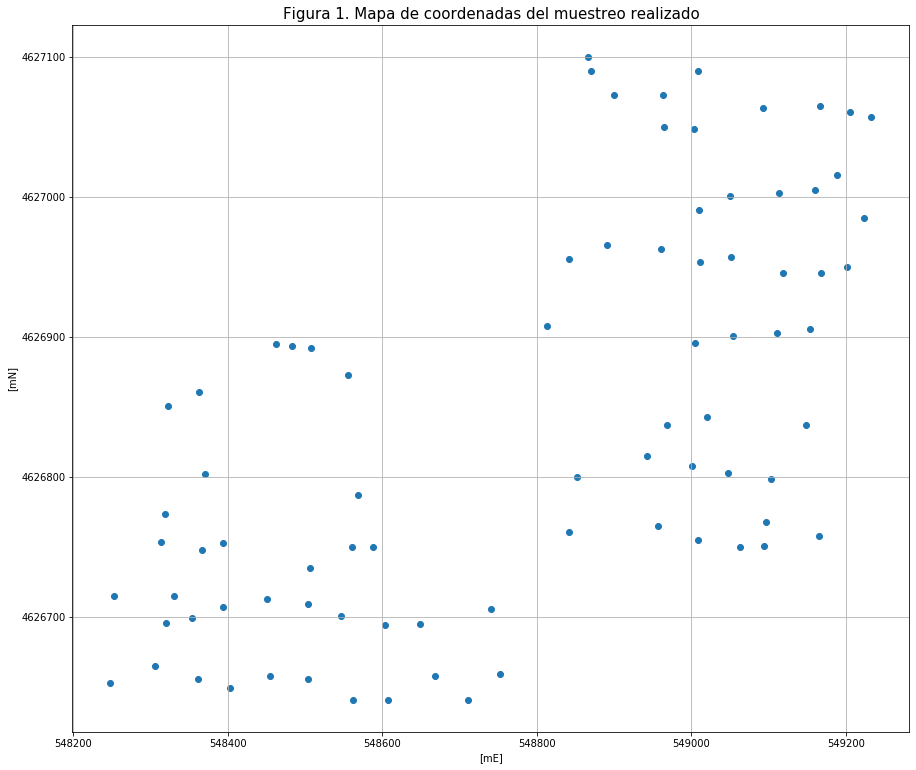

In [8]:
#-----------------------------------------------VISUALIZACIÓN DE LOS DATOS-----------------------------------------------------
#Se realiza una visualización rápida de los datos muestreados y su ubicación
plt.figure(figsize=(15,13)) 
plt.scatter(datos.este,datos.norte)
plt.title('Figura 1. Mapa de coordenadas del muestreo realizado', fontsize=15)
plt.xlabel('[mE]')
plt.ylabel('[mN]')
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 1. Mapa de coordenadas del muestreo realizado</p>

# Histogramas <a name='Histogramas'/>

<p style="margin-top:25px">A continuación, se presenta el mosaico de histogramas de cada uno de los elementos contenidos en el set de datos. Se decidió dividir la información en 20 clases, de tal manera que se dividiera el rango de valores de concentración, y así cada una de clases creada representaría el 5% del rango.
</p>
<p>El procedimiento realizado consistió en lo siguiente:
</p>
<ol>
  <li>Establecer las dimensiones del mosaico</li>
  <li>Crear el mosaico</li>
  <li>Definir el tamaño del gráfico</li>
  <li>Definir el espaciamiento entre los histogramas</li>
  <li>Seleccionar una columna</li>
  <li>Calcular el histograma y otorgarle el formato correcto</li>
  <li>Repetir el procedimiento para la columna siguiente</li>
</ol>

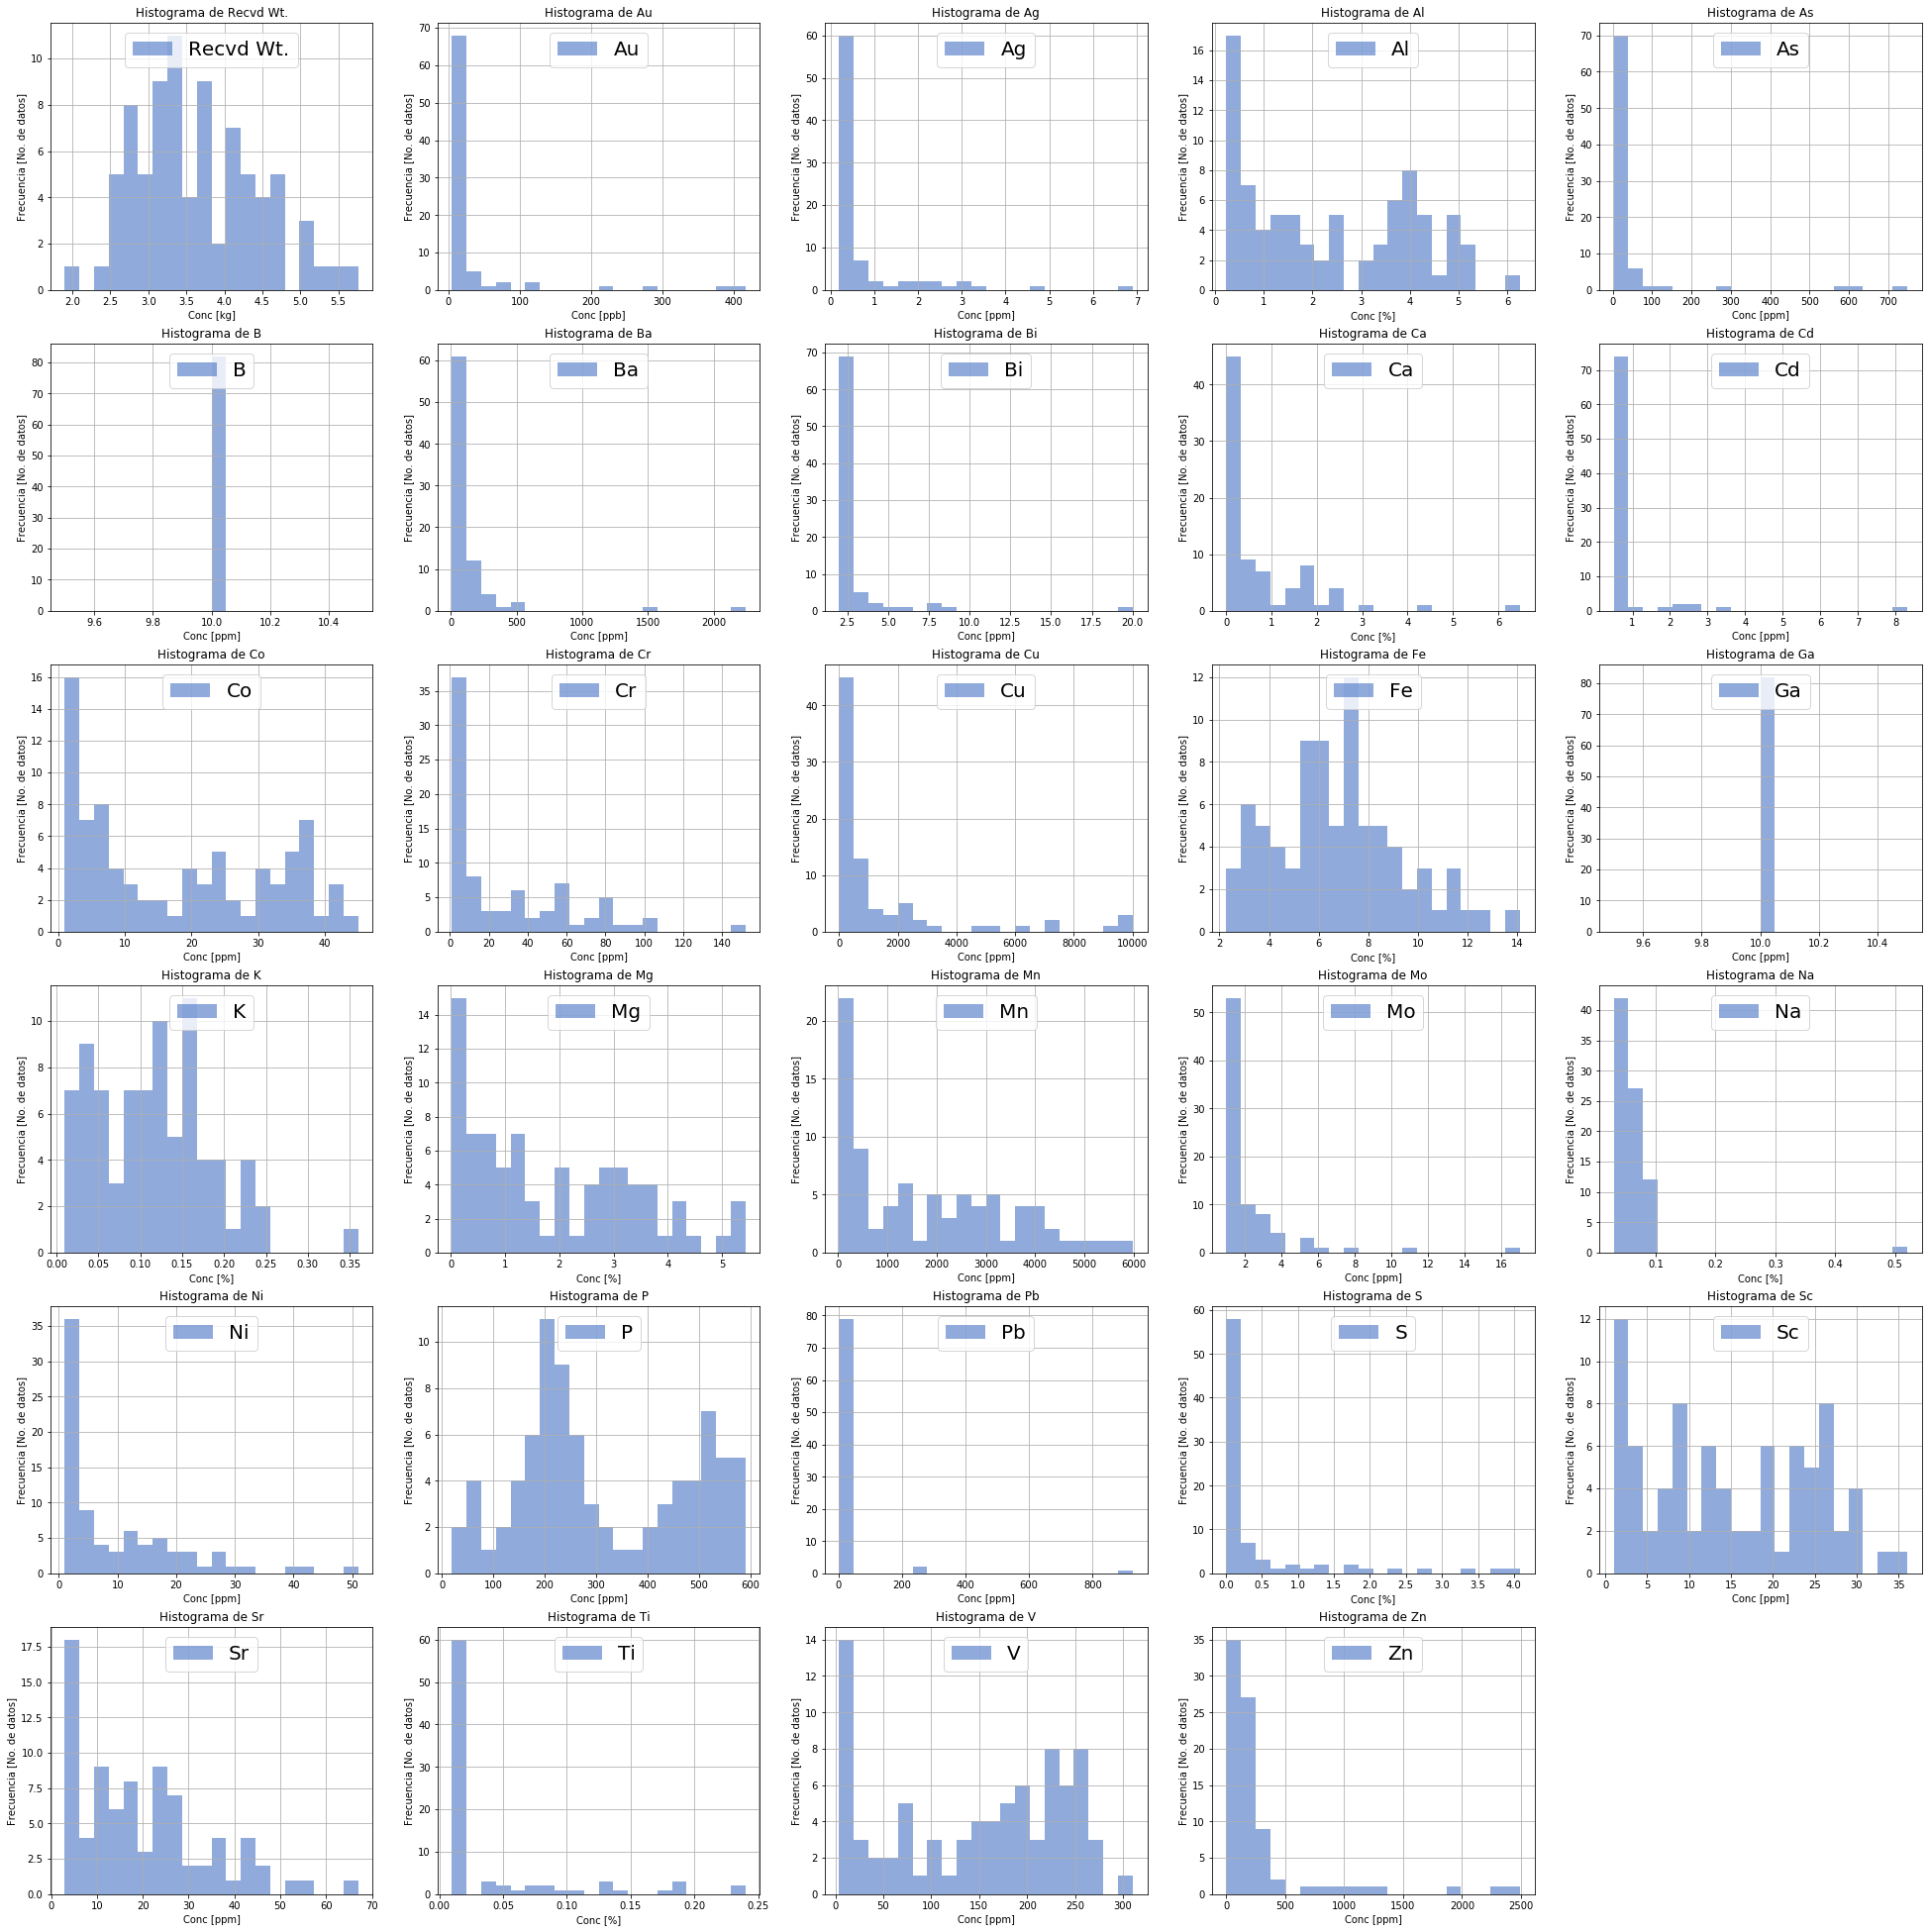

In [9]:
#-------------------------------------------------------HISTOGRAMAS-------------------------------------------------------------
#Se establecen las dimensiones del mosaico de histogramas
#Los valores pueden ser mayores al contenido de histogramas pero no menor
dimy=6
dimx=5
temp=0
#Se crea una clase que permite detener la graficación de histogramas, en caso de haber terminado con las columnas de datos
class BreakAllTheLoops(BaseException): pass
#Se crea la variable del mosaico ("gridspec")
AX = gridspec.GridSpec(dimy,dimx)
#Se definen los tamaños de cada figura 
plt.figure(figsize=(30,30))
#Se definen las separaciones entre cada figura 
plt.subplots_adjust(top = 1, right=1)
#Se define el manejo la excepción (try/catch)
try:
    #Se definen dos bucles para cambiar la posicón en el mosaico
    for i in range(dimy):
        for j in range(dimx):  
            #Se usa la excepción para terminar el ciclo en caso de haber terminado de graficar todos los elementos
            if (temp==len(datos.columns)-2):
                raise BreakAllTheLoops()  
            #Se grafica el histograma en la posición del mosaico indicada
            plt.subplot(AX[i,j])
            plt.hist(datos[datos.columns[temp+2]], facecolor='#4472C4',alpha=0.6,label=datos.columns[temp+2], bins=20)
            plt.xlabel('Conc ['+agregar[temp+2]+']'); plt.ylabel('Frecuencia [No. de datos]'); 
            plt.title('Histograma de '+datos.columns[temp+2])
            plt.legend(loc='upper center',prop={'size': 20})
            plt.grid()
            #Se aumenta el contador que controla el número de histogramas a graficar
            temp+=1;
except BreakAllTheLoops:
    pass
#Se guarda una imagen del mosaico de histogramas
plt.savefig('Histogramas.png')
#Se muestra el mosaico
#Nota: En caso de querer visualizar mejor, dar doble click en la imagen
#Por si acaso el programa crea una imagen del mosaico que se guarda en la carpeta donde es ejecutado el programa
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 2. Mosaico de histogramas de elementos contenidos en el set de datos</p>

<p>Dentro del mosaico anterior, podemos definir dos tipos de comportamientos característicos:</p>
<ol>
    <li>Distribución mayoritaria de frecuencias en un valor específico del rango.</li>
    <li>Distribución de frecuencias a lo largo del rango.</li>
</ol>   

<p>En el primer comportamiento, como su nombre lo indica, existe una valor de concentración principal que se tiende a repetir de manera destacable. Existen valores en otras frecuencias dentro del rango, pero presentan frecuencias menores en comparación con la frecuencia principal.Dentro de este comportamiento se encuentran la mayoría de los elementos, los cuales son: Au, Ag, As, B, Ba, Bi, Ca, Cd, Cr, Cu,Ga, Mo, Na, Pb, S y Ti.
</p>
<p>En el segundo comportamiento, la distribución de frecuencias no se encuentra tan concentrada, sino que los valores tienen una mayor variabilidad. Los elementos que presentan este comportamiento son: Al, Co, Fe, K , Mg, Mn, Ni, P, Sc, Sr, Vy Zn.
</p>
<p>Sin embargo, existen elementos que a pesar de presentar un comportamiento en el que la distribución de frecuencias está dado a lo largo del rango, aún existe la presencia de un valor principal, por lo que respresentan un comportamiento intermedio. Como es el caso del Al, Mn y Ni.
</p>
<p>Por otra parte, algunos elementos presentan su distribución de frecuencias dentro de un rango muy pequeño, tales como: Bi, Pb y Na. Mientras que otros, como B y Ga, contienen el total de datos en una misma clase.
</p>

<p>Debido a la distribución observada en los datos, distinta a la distribución gaussiana y focalizada en un solo punto, se optó por eliminar las siguientes columnas de datos:
Au, Ag, As, B, Ba, Bi, Cd, Pb, S, Ti, Na
</p>

In [10]:
#['Au','Ag', 'As', 'B', 'Ba', 'Bi', 'Cd', 'Pb', 'S', 'Ti', 'Na']
#['Au','Ag', 'As', 'B', 'Ba', 'Bi', 'Cd', 'Pb']

In [11]:
#Eliminación de columnas con distribución
datos.drop(['Au','Ag', 'As', 'B', 'Ba', 'Bi', 'Cd', 'Pb','Mo', 'Na', 'Ti'], axis=1, inplace=True)
#Se eliminan los tipos de concentración de las columnas a eliminar
agregar.drop(labels=['Au','Ag', 'As', 'B', 'Ba', 'Bi', 'Cd', 'Pb', 'Mo', 'Na', 'Ti'], inplace=True)

In [12]:
#Dataframe después de la limpieza completa de los datos
datos.head()

,norte,este,Recvd Wt.,Al,Ca,Co,Cr,Cu,Fe,Ga,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
0,4627001.0,549050.0,2.78,3.71,0.09,13.0,26.0,6040.0,10.20,10.0,0.07,1.65,1700.0,8.0,220.0,0.03,12.0,11.0,155.0,139.0
1,4627049.0,549003.0,3.32,5.13,0.02,32.0,77.0,2180.0,11.35,10.0,0.01,3.42,3650.0,20.0,160.0,0.01,28.0,5.0,240.0,280.0
2,4627073.0,548963.0,2.76,1.39,0.61,7.0,21.0,7480.0,6.62,10.0,0.12,0.33,1475.0,2.0,230.0,0.07,8.0,67.0,105.0,44.0
3,4627050.0,548964.0,3.20,1.74,0.14,2.0,60.0,1030.0,8.41,10.0,0.14,0.40,148.0,5.0,70.0,0.07,11.0,16.0,165.0,48.0
4,4627090.0,548870.0,3.42,0.23,2.41,4.0,6.0,4530.0,3.62,10.0,0.06,1.16,286.0,2.0,360.0,0.04,12.0,46.0,26.0,58.0


# Valores más altos (5%) <a name='valores'/>

<p>Posteriormente, se hizo el cálculo del 5% más alto de los datos por elemento. Los valores obtenidos se  guardaron dentro de un mismo set de datos. Luego, se graficaron, junto con el mapa de coordenadas de todos lo puntos muestreados para obtener la distribución espacial de los datos con mayor concentración de los elementos.</p>
<p>El proceso fue el siguiente:
</p>
<ol>
    <li>Definir el porcentaje de valores altos deseado (5%).</li>
    <li>Calcular el número de datos correspondiente al porcentaje especificado. Debido a que todas las columnas de elementos tiene la misma longitud, es un valor contante en todas los elementos.</li>
    <li>Se selecciona una columna de elementos.</li>
    <li>Se ordena el número de elementos de mayor a menor.</li>
    <li>Selecciona el número de datos calculado en la lista de valores ordenados.</li>
    <li>Se almacenanan los valores de un set de datos.</li>
    <li>Definir el porcentaje de valores altos deseado (5%).</li>
    <li>Se repite para la columna siguiente.</li>
    <li>Una vez terminadas las columnas, se define un nuevo mosaico.</li>
    <li>Se definene las características del mosaico.</li>
    <li>Se selecciona una columna.</li>
    <li>Se grafican los valores más altos en el mapa de coordenadas, junto con todos los datos muestreados.</li>
    <li>Se repite el proceso hasta terminar con todas las columnas de elementos.</li>
    <li>Finalmente, se calcula el número de datos contenidos en cada división del grid para obtener las ubicaciones de mayor concentración</li>
</ol>   




In [13]:
#-----------------------------------------------------Cuantil 95%---------------------------------------------------------------
#Se define el porcentaje de datos que se desean dentro del rango del cuantil (5%)
porc=5
#Se calcula el número de datos
vm=m.ceil((porc*len(datos[datos.columns[0]])/100))
#Se crea un nuevo dataframa donde se almacenarán los valores más altos
df = pd.DataFrame(columns=['norte', 'este', 'Valor', 'elemento'])
#Se utiliza un ciclo para hacer el mismo proceso en todas las columnas menos en dos (norte, este)
for i in range (len(datos.columns)-2):
    #Se ordenan los valores de mayor a menor, se selecciona el número de datos a utilizar
    va=(datos.sort_values([datos.columns[i+2]], ascending=False)[['norte','este',datos.columns[i+2]]].head(vm)).copy()
    va.rename(columns={va.columns[2]:'Valor'},inplace = True)
    #Se define el elemento al que pertenece la selección de datos realizada
    va['elemento']= datos.columns[i+2] 
    #Se guardan los valores en el dataframe creado anteriormente
    df=df.append(va)
#Se reinician los índices
df.reset_index(drop=True, inplace=True)
#Se muestra el dataframe de los datos datos correspondientes al 5%
df.head(15)

,norte,este,Valor,elemento
0,4627016.0,549188.0,5.76,Recvd Wt.
1,4626861.0,548363.0,5.40,Recvd Wt.
2,4626802.0,548370.0,5.36,Recvd Wt.
3,4626991.0,549010.0,5.18,Recvd Wt.
4,4627057.0,549233.0,5.08,Recvd Wt.
5,4626765.0,548957.0,6.26,Al
6,4626963.0,548960.0,5.23,Al
7,4626706.0,548740.0,5.21,Al
8,4627049.0,549003.0,5.13,Al
9,4627090.0,549009.0,4.93,Al


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 4. Datos más altos seleccionados</p>

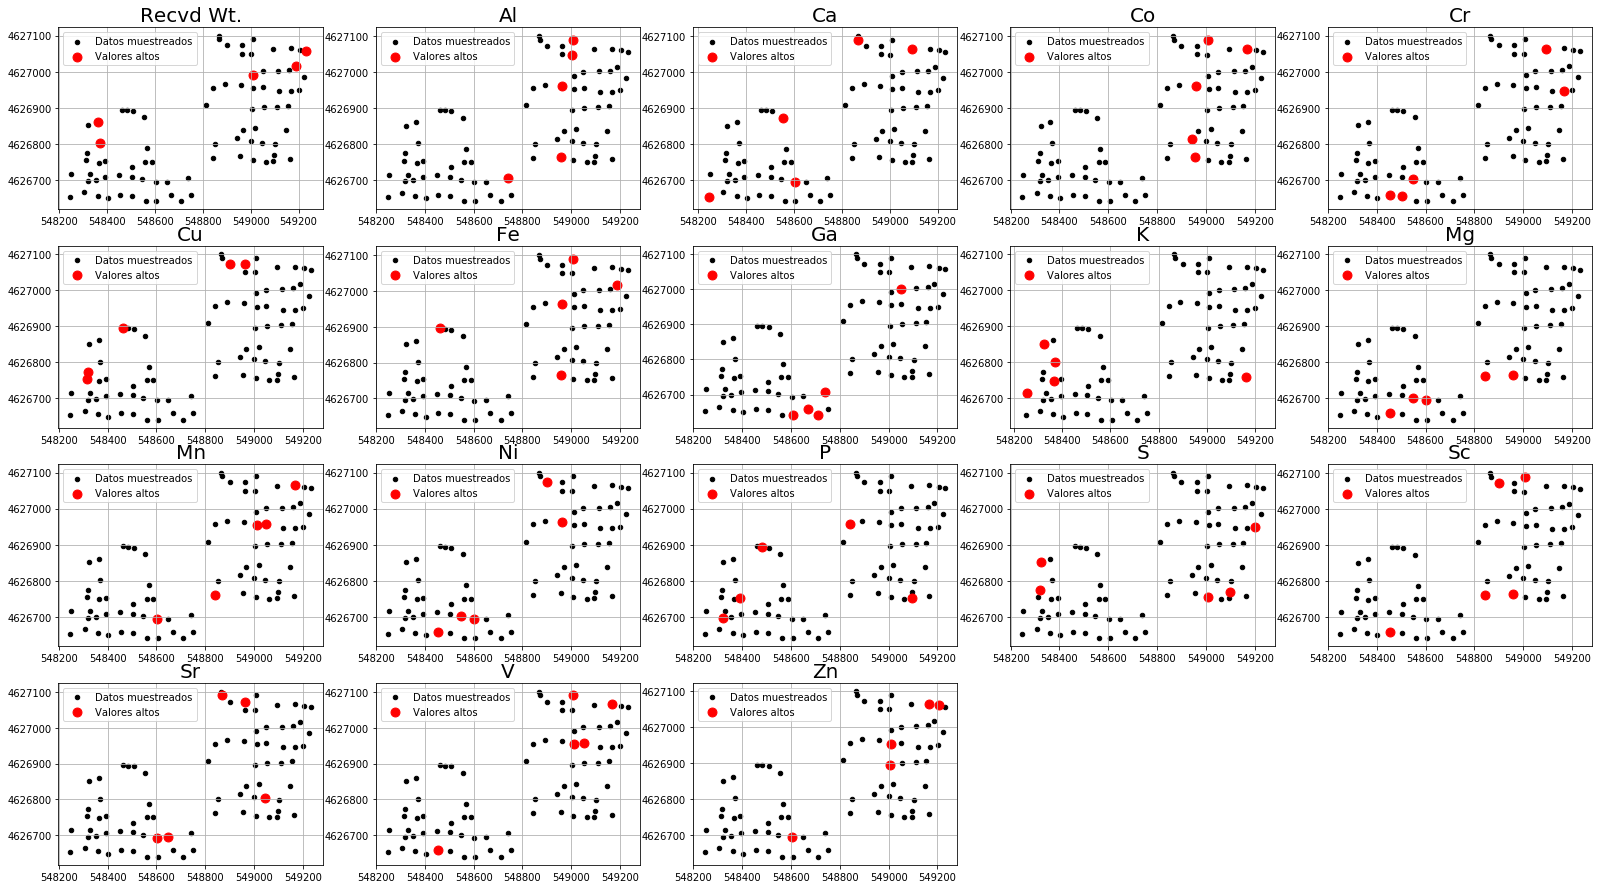

In [14]:
#-----------------------------------------------------MOSAICO DE COORDENADAS----------------------------------------------------
temp=0
#Se crea una nueva variable para el mosaico
VA = gridspec.GridSpec(dimy,dimx)
#Se define el tamaño de la figura
plt.figure(figsize=(12,12))
#Se define el espaciamiento entre mapas de coordenadas
plt.subplots_adjust(top = 1.6, right=1.9)
#Se definen los ciclos de graficación para el mosaico
try:
    for i in range(dimy):
        for j in range(dimx):            
            if (temp==len(df)):
                raise BreakAllTheLoops()            
            plt.subplot(VA[i,j])
            plt.title(df.elemento[temp], fontsize=20)
            plt.scatter(datos.este,datos.norte, color='black', s=20, label='Datos muestreados') 
            plt.scatter(df.este[temp:(temp+5)],df.norte[temp:(temp+5)], color='red', s=80,  label='Valores altos') 
            #plt.xlabel('[mE]') Se eliminaron por cuestiones de visualización
            #plt.ylabel('[mN]')
            plt.grid()
            plt.legend()
            temp+=5;
except BreakAllTheLoops:
    pass
#Se guarda el mosaico creado en una imagen
plt.savefig('Mosaico.png')
#Se muestra el mosaico
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 3. Mosaico de coordenadas de muestreo de valores regulares (en color negro) y valores más altos (en color rojo)</p>

In [15]:
#Ubicación de zonas de mayor concentración de valores altos
i=0
j=0
temp2=[]
#Se crea un ciclo que varía la posición del box de coordenadas que cuenta la posición
for j in range(6):
    #Variación de las coordenadas en metros norte
    cy1=4626600+(j*100)
    cy2=4626700+(j*100)
    for i in range (6):
        #Variación de las coordenadas en metros este
        cx1=548200+(i*200)
        cx2=548400+(i*200)
        #Se calcula el número de valores altos dentro del box definido
        temp=len(df[(df['este']>cx1)&(df['este']<cx2)&(df['norte']>cy1)&(df['norte']<cy2)])
        #Se imprimen los resultados obtenidos
        print ('Datos contenidos entre: ',cx1,'-', cx2,'[mE] y', cy1,'-', cy2,'[mN]', 'son:',temp)
        #Se guardan los valores más altos en una variable
        if (temp>8):
            temp2.append((cx1+cx2)/2)
            temp2.append((cy1+cy2)/2)
    print ('\n')

Datos contenidos entre:  548200 - 548400 [mE] y 4626600 - 4626700 [mN] son: 2
Datos contenidos entre:  548400 - 548600 [mE] y 4626600 - 4626700 [mN] son: 6
Datos contenidos entre:  548600 - 548800 [mE] y 4626600 - 4626700 [mN] son: 10
Datos contenidos entre:  548800 - 549000 [mE] y 4626600 - 4626700 [mN] son: 0
Datos contenidos entre:  549000 - 549200 [mE] y 4626600 - 4626700 [mN] son: 0
Datos contenidos entre:  549200 - 549400 [mE] y 4626600 - 4626700 [mN] son: 0


Datos contenidos entre:  548200 - 548400 [mE] y 4626700 - 4626800 [mN] son: 6
Datos contenidos entre:  548400 - 548600 [mE] y 4626700 - 4626800 [mN] son: 3
Datos contenidos entre:  548600 - 548800 [mE] y 4626700 - 4626800 [mN] son: 2
Datos contenidos entre:  548800 - 549000 [mE] y 4626700 - 4626800 [mN] son: 8
Datos contenidos entre:  549000 - 549200 [mE] y 4626700 - 4626800 [mN] son: 4
Datos contenidos entre:  549200 - 549400 [mE] y 4626700 - 4626800 [mN] son: 0


Datos contenidos entre:  548200 - 548400 [mE] y 4626800 - 4

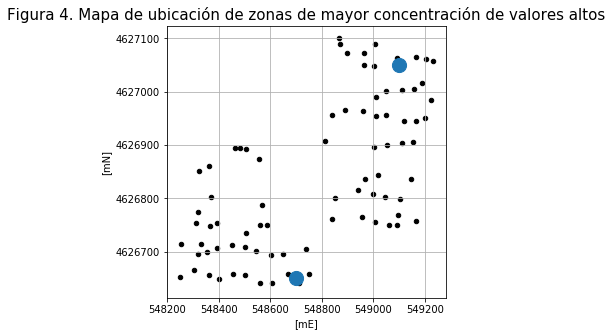

In [16]:
#-----------------------------------------------VISUALIZACIÓN DE LOS DATOS-----------------------------------------------------
#Se realiza una visualización rápida de las zonas con valores más altos y su ubicación
temp2=(np.array(temp2))
plt.figure(figsize=(5,5)) 
plt.scatter(datos.este,datos.norte, color='black', s=20, label='Datos muestreados') 
plt.scatter(temp2[0::2],temp2[1::2], s=200)
plt.title('Figura 4. Mapa de ubicación de zonas de mayor concentración de valores altos', fontsize=15)
plt.xlabel('[mE]')
plt.ylabel('[mN]')
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 4. Mapa de coordenadas de zonas de mayor concentración de datos con los valores más altos (en color azul) y valore datos muestreados (en color negro)</p>

<p>Analizando la distribución de los datos muestreados, podemos observar que los datos obtenidos no obedecen un patrón de muestreo definido. No obstante, se observan dos agrupaciones principales de datos ubicadas al noreste y al suroeste respectivamente, de aproximadamente el mismo número de muestreos en cada uno.</p>
<p>En cuanto a las posiciones de los valores con concentraciones más altas notamos que existe una gran distribución de ellos a lo largo de la zona de estudio. A pesar de ello, podemos resaltar tres zonas de ocurrencia máxima de concentración de elementos:
</p>
<ol>
    <li>Zona 1:Datos contenidos entre:  548600 - 548800 [mE] y 4626600 - 4626700 [mN] son: 16</li>
    <li>Zona 2: Datos contenidos entre:  548200 - 548400 [mE] y 4626700 - 4626800 [mN] son: 15</li>
    <li>Zona 3: Datos contenidos entre:  549000 - 549200 [mE] y 4627000 - 4627100 [mN] son: 20</li>
</ol> 
<p>Debido a lo mostrado anteriormente, podemos determinar que la zona de mayor concentración general de elementos se ubica entre las coordenadas 549000 - 549200 [mE] y 4627000 - 4627100 [mN]
</p>


# Boxplots <a name='Boxplots'/>

<p>Se realizó el cálculo de los boxplots de la información dada para poder obtener una visualización rápida 
de la información en cada uno de los elementos, así como también para fines comparativos.</p>
<p>Para la respresentación de los boxplots, se resulta necesario dividir los elementos en los dos grupos de concentración 
principales(% o ppm). Sin embargo, debido a que existen valores de ppb se optó por crear un tercer grupo. Es posible hacer la
conversión de ppb a ppm, pero esto implicaría dividir los valores entre 1000, lo cual generaría una pérdida en la visualización
de la información contenida en el boxplot.
</p>
<p>A pesar de las divisiones realizadas, los rangos de oscilación de las concentraciones de los elementos es amplio, por lo que al graficar los diferentes elementos no es posible visualizar la información contenida en el boxplot con precisión. Debido a esto, se realizaron subdivisiones, estableciendo rangos entre las divisiones previas con base en los valores máximos de cada elemento. 
Los rangos en los que se graficaron los boxplots fueron los siguientes:
</p>
<p>-Concentraciones en porcentaje:
</p>
<ol>
    <li>Concentraciones menores al 5%</li>
    <li>Concentraciones mayores al 5%</li>
</ol> 
<p>-Concentraciones en partes por millón:
</p>
<ol>
    <li>Concentraciones máximas menores a 20 ppm</li>
    <li>Concentraciones máximas menores a 100 ppm y mayores a 20 ppm</li>
    <li>Concentraciones máximas menores a 1000 ppm y mayores a 100 ppm</li>
    <li>Concentraciones máximas mayores a 1000 ppm</li>
</ol>
<p>-Concentraciones en partes por billón</p>
<p>Debido a los problemas de visualización que producían los outliers, también fueron removidos</p>


In [17]:
#Se separan aquellos datos cuya concentración está dada en porcentaje 
cporc=np.where(agregar=='%')
#Se almacenan los datos en un dataframe de porcentaje
dporc=datos[datos.columns[cporc]]
dporc.head()

,Al,Ca,Fe,K,Mg,S
0,3.71,0.09,10.20,0.07,1.65,0.03
1,5.13,0.02,11.35,0.01,3.42,0.01
2,1.39,0.61,6.62,0.12,0.33,0.07
3,1.74,0.14,8.41,0.14,0.40,0.07
4,0.23,2.41,3.62,0.06,1.16,0.04


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 5. Set de datos de concentración en porcentaje</p>

In [18]:
#Se separan aquellos datos cuya concentración está dada en ppm
cppm=np.where((agregar=='ppm'))
#Se almacenan los datos en un dataframe de ppm
dppm=datos[datos.columns[cppm]]
dppm.head()

,Co,Cr,Cu,Ga,Mn,Ni,P,Sc,Sr,V,Zn
0,13.0,26.0,6040.0,10.0,1700.0,8.0,220.0,12.0,11.0,155.0,139.0
1,32.0,77.0,2180.0,10.0,3650.0,20.0,160.0,28.0,5.0,240.0,280.0
2,7.0,21.0,7480.0,10.0,1475.0,2.0,230.0,8.0,67.0,105.0,44.0
3,2.0,60.0,1030.0,10.0,148.0,5.0,70.0,11.0,16.0,165.0,48.0
4,4.0,6.0,4530.0,10.0,286.0,2.0,360.0,12.0,46.0,26.0,58.0


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 6. Set de datos de concentración en partes por millón</p>

In [19]:
#Se separan aquellos datos cuya concentración está dada en ppm
cppb=np.where((agregar=='ppb'))
#Se almacenan los datos en un dataframe de ppm
dppb=datos[datos.columns[cppb]]
dppb.head()

""
0
1
2
3
4


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 7. Set de datos de concentración en partes por billón</p>

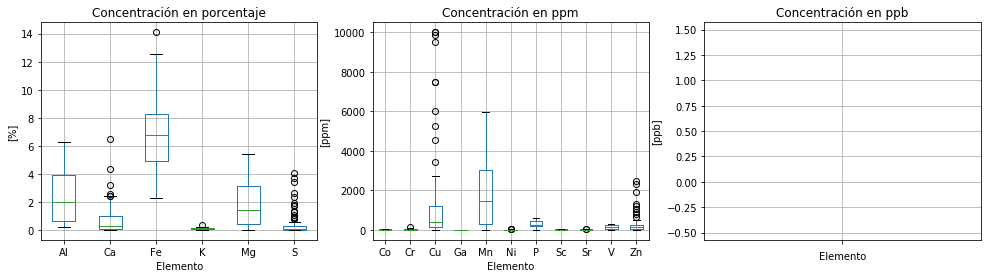

In [20]:
plt.subplot(1, 3, 1)
plt.subplots_adjust(right=2.3)

dporc.boxplot()
plt.title('Concentración en porcentaje')
plt.ylabel('[%]')
plt.xlabel('Elemento')

plt.subplot(1, 3, 2)
dppm.boxplot()
plt.title('Concentración en ppm')
plt.ylabel('[ppm]')
plt.xlabel('Elemento')

plt.subplot(1, 3, 3)
dppb.boxplot()
plt.title('Concentración en ppb')
plt.ylabel('[ppb]')
plt.xlabel('Elemento')

plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 5. Boxplots de las divisiones de datos principales: porcentaje(izquierda), ppm(centro) y ppb(derecha)</p>

<h4>Boxplot de elementos en porcentaje</h4>

Text(0, 0.5, 'Concentración [%]')

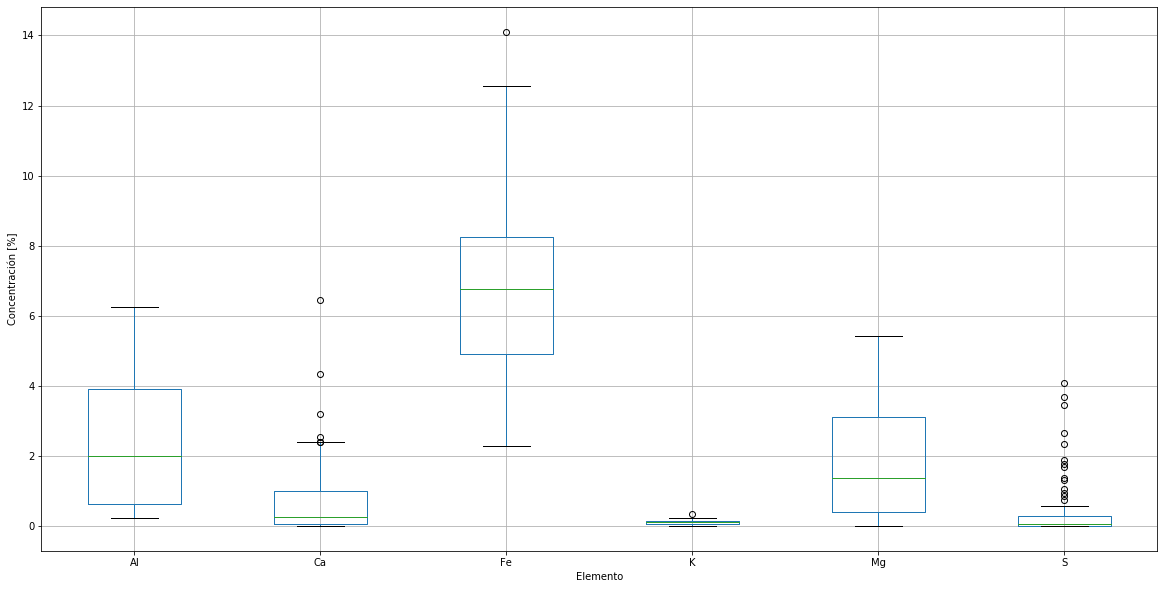

In [21]:
dporc.boxplot(figsize=[20,10])
plt.xlabel('Elemento')
plt.ylabel('Concentración [%]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 6. Set de datos de concentraciones en porcentaje</p>

Text(0, 0.5, 'Concentración[%]')

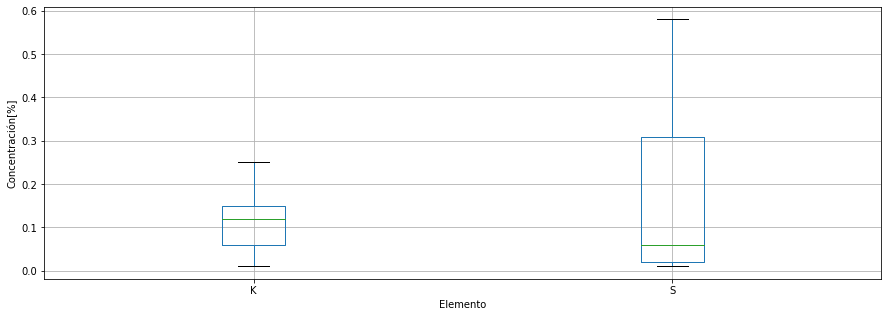

In [22]:
dporc[dporc.columns[np.where((dporc.max()<5)==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración[%]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 7. Set de datos de concentración en porcentaje menores al 5%</p>

Text(0, 0.5, 'Concentración [%]')

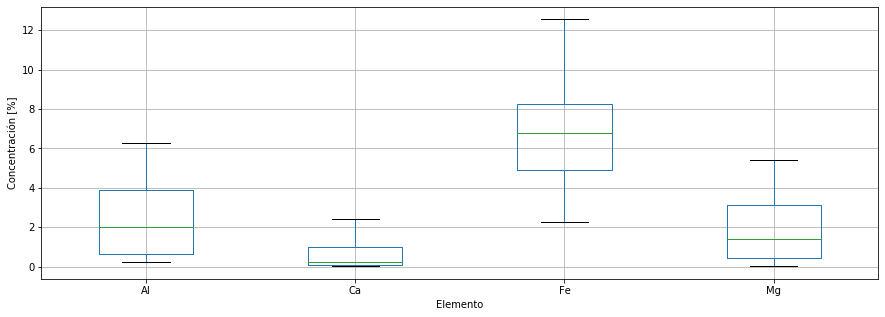

In [23]:
dporc[dporc.columns[np.where((dporc.max()>5)==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [%]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 8. Set de datos de concentración en porcentaje mayores al 5%</p>

<p>De forma general, en el caso de las concentración dadas en porcentaje, podemos observar que los valores oscilan en un rango de 0.01 - 14.1%.
Sin embargo, la mayoría de los elementos oscilan en valores bajos de porcentaje y con rangos de variación muy pequeños, como es el caso del K, Na, S y Ti. Elementos como el Al y Mg tienen rangos de variación intermedios, con valores ligeramente más altos en porcentaje. En el caso del Fe se presentan los porcentajes más altos, pero también el rango de variación más grande.
</p>
<p>
El valor de las medianas se mantiene en la mayoría de los casos menor al 2%, únicamente sobrepasado por el Al(2.03%) y el Fe(6.76%). La presencia de outliers se observa principalmente en el Ca y S. Siendo este último el que presenta mayor cantidad de outliers. Pero, analizando de forma general, la presencia de outliers es escasa.
</p>

<h4>Boxplot de elementos en partes por millón</h4>

Text(0, 0.5, 'Concentración [ppm]')

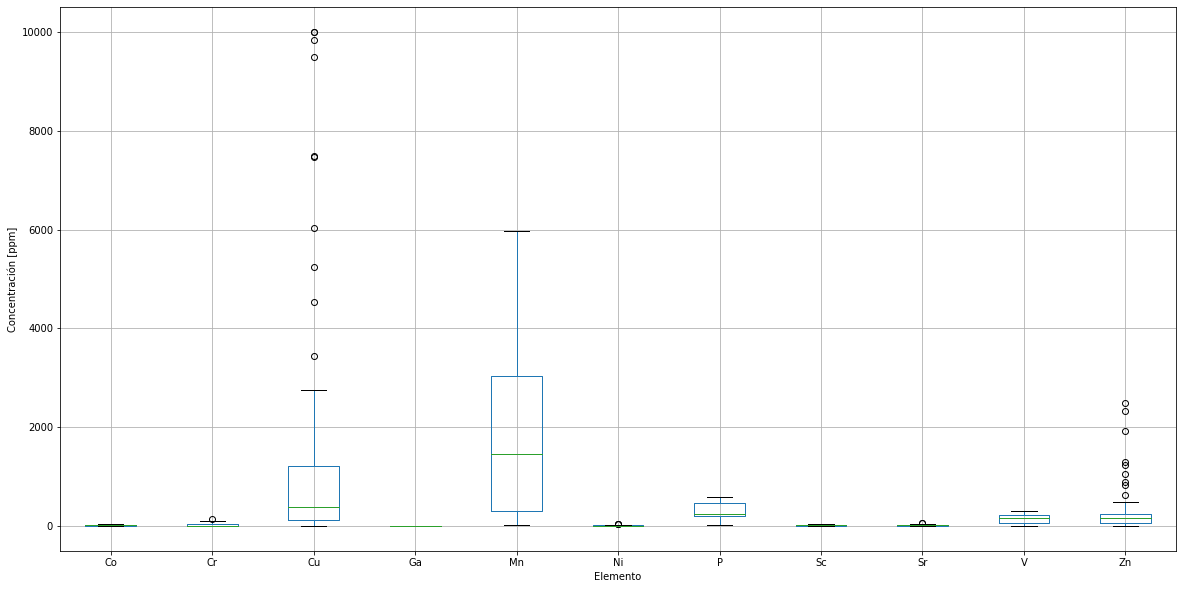

In [24]:
dppm.boxplot(figsize=[20,10])
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppm]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 9. Set de datos de concentración en partes por millón</p>

Text(0, 0.5, 'Concentración [ppm]')

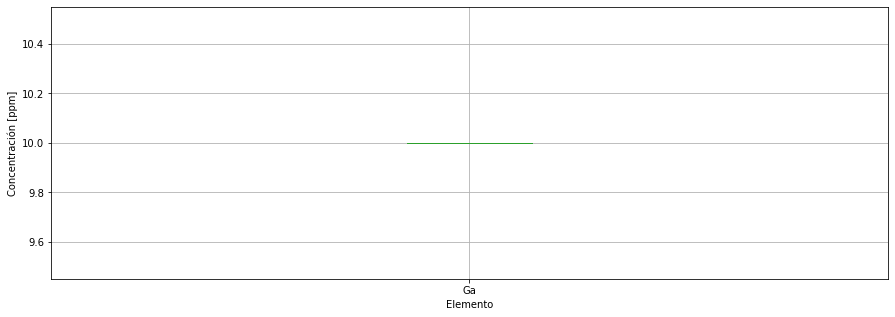

In [25]:
dppm[dppm.columns[np.where((dppm.max()<=20)==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppm]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 10. Set de datos de leyes en partes por millón menores a 10 ppm</p>

Text(0, 0.5, 'Concentración [ppm]')

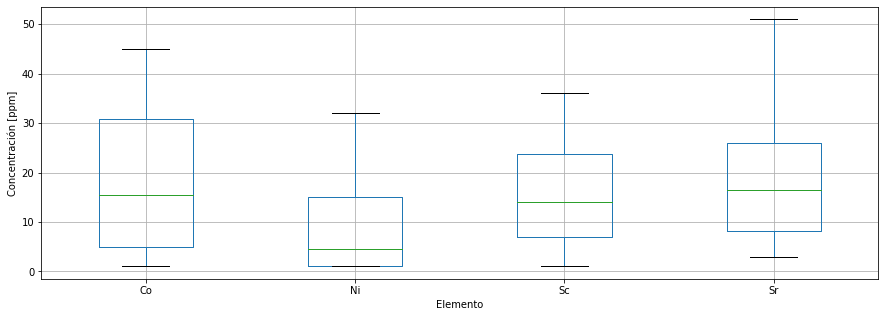

In [26]:
dppm[dppm.columns[np.where(((dppm.max()<=100)&(dppm.max()>20))==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppm]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 11. Set de datos de concentración en partes por millón mayores a 10 ppm y menores a 100 ppm</p>

Text(0, 0.5, 'Concentración [ppm]')

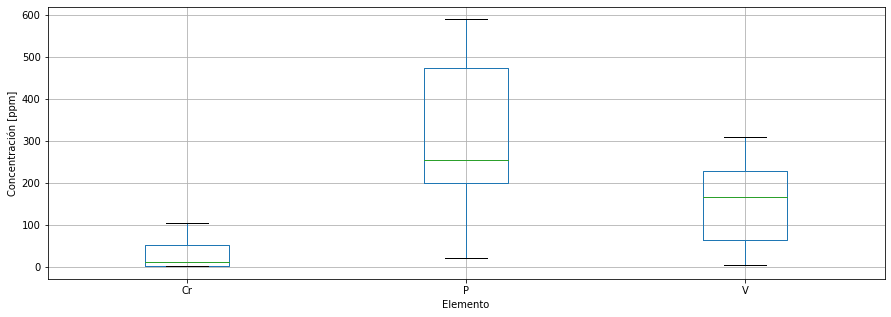

In [27]:
dppm[dppm.columns[np.where(((dppm.max()<=1000)&(dppm.max()>100))==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppm]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 12. Set de datos de leyes en partes por millón mayores a 100 ppm y menores a 1000 ppm</p>

Text(0, 0.5, 'Concentración [ppm]')

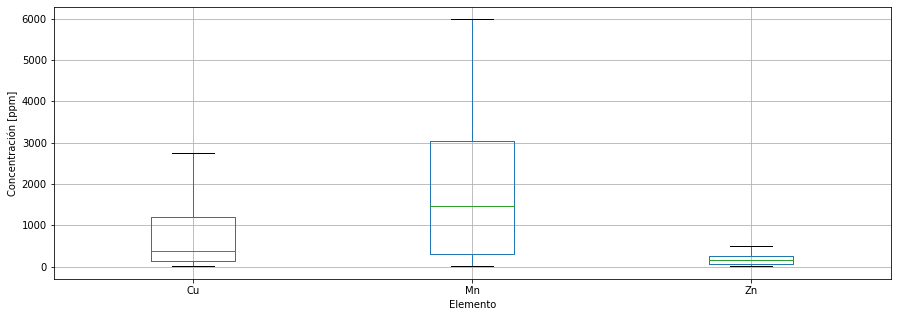

In [28]:
dppm[dppm.columns[np.where(((dppm.max()>1000))==True)]].boxplot(figsize=[15,5], showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppm]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 13. Set de datos de concentración en partes por millón mayores a 1000 ppm </p>

<p>En este caso, es difícil establecer características generales de los datos, debido a que existe demasiada variabilidad en todas
las caracterítisticas observadas. Esto es provocado porque en este caso existen elementos con un rango de variación de hasta 6000 ppm,
mientras que existen otros con el mismo valor en todos los datos. Dentro de lo que se puede observar, los elementos que presentan mayor 
rango de variación son el Cu y Mn, los que presentan menor rango de variación son el B, Cd y Ga. Estos mismos elementos son los que presentan
menor cantidad de outliers. Por otra parte, elementos como Cu, Zn, As, y Ba presentan una gran cantidad de outliers.
</p>
<p>
Analizando los valores máximos menores o iguales a 20 ppm, se observan valores constantes, con poco o nulo rango de variación y con medianas cercanas a 0 o a 10. Los elementos contenidos en este rango son: Ag, B,Bi, Cd, Ga y Mo.
Por otro lado, en los elementos con maximos entre 20 - 100 ppm, se presentan rangos de variación mayores, con variaciones entre 
30 - 50 ppm. Las medianas se mantienen constantes, entre aproximadamente 5 - 15 ppm. En este rango se encuentran: Co, Ni, Sc y Sr.
El siguiente rango(100 - 1000 ppm), elementos como As, Cr y Pb presentan rangos de variación y medianas similares a las del rango anterior. Mientras que los demás elementos del rango (P y V), tienen un rango de variación mayores, de 600 y 300 ppm aproximadamente, así como medianas cercanas a los 200 ppm.
Finalmente, en el rango de valores mayores a 1000 ppm se tiene una alta variación de valores, principalmente en elementos como Cu y Mn
</p>

<h4>Boxplot de elementos en partes por billón</h4>

Text(0, 0.5, 'Concentración [ppb]')

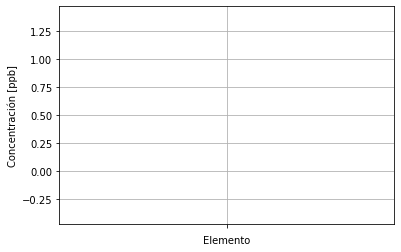

In [29]:
dppb.boxplot(showfliers=False)
plt.xlabel('Elemento')
plt.ylabel('Concentración [ppb]')

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 13. Set de datos de concentración en partes por billón</p>

<p>Por último, las concentraciones de Au son los valores de concentración más pequeños. Estaría en un rango de 0.005 - 0.030 ppm, con una mediana de 0.0075 ppb. Los rangos de variación son muy cortos.
</p>

<h1 style="text-align: center; font-size: 35px; margin-top: 150px;">Análisis multivariable</h1><a name='AM'/>

<p>Antes de iniciar el análisis mutivariable es necesario realizar una limpieza de los datos. Aquellos elementos que no representen una distribución gaussiana tendrán que ser eliminados. Esto incluye elementos cuya concentración de valores se da en un único valor, dichos elementos corresponden a una desviación estándar de 0.
</p>


In [30]:
#Se eliminan los valores con desviación estándar = 0
datos.drop(datos.columns[np.where(datos.std()==0)[0]], axis=1, inplace=True)

In [31]:
#Se muestra el set de datos limpios
datos.head()

,norte,este,Recvd Wt.,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
0,4627001.0,549050.0,2.78,3.71,0.09,13.0,26.0,6040.0,10.20,0.07,1.65,1700.0,8.0,220.0,0.03,12.0,11.0,155.0,139.0
1,4627049.0,549003.0,3.32,5.13,0.02,32.0,77.0,2180.0,11.35,0.01,3.42,3650.0,20.0,160.0,0.01,28.0,5.0,240.0,280.0
2,4627073.0,548963.0,2.76,1.39,0.61,7.0,21.0,7480.0,6.62,0.12,0.33,1475.0,2.0,230.0,0.07,8.0,67.0,105.0,44.0
3,4627050.0,548964.0,3.20,1.74,0.14,2.0,60.0,1030.0,8.41,0.14,0.40,148.0,5.0,70.0,0.07,11.0,16.0,165.0,48.0
4,4627090.0,548870.0,3.42,0.23,2.41,4.0,6.0,4530.0,3.62,0.06,1.16,286.0,2.0,360.0,0.04,12.0,46.0,26.0,58.0


<p>Ahora bien, una vez que se cuenta con los datos limpios, es necesario hacer una normalización de los mismos.
Esto se debe a que el rango de valores en cada elemento oscila en magnitudes diferentes, por lo que no son comparables.
</p>
<p>Cuando se realiza la normalización se obtienen valores dentro del mismo rango y por lo tanto equiparables para el proceso subsecuente.
</p>

In [32]:
#Se normalizan los datos
datosnor = pd.DataFrame(columns=[datos.columns])
#Para versiones de Jupyter Notebook < 6.0.0
#datosnor[datos.columns]=(datos-datos.mean())/datos.std()
#Para versiones de Jupyter Noteobook > 6.0.0
datosnor=(datos-datos.mean())/datos.std()
datosnor.head()

,norte,este,Recvd Wt.,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
0,1.158407,0.863976,-1.085915,0.785483,-0.605919,-0.348536,-0.082882,1.878843,1.350309,-0.671381,-0.124541,-0.073522,-0.145141,-0.561698,-0.458977,-0.290624,-0.645802,0.082472,-0.329398
1,1.502234,0.712588,-0.407333,1.621894,-0.670386,1.015834,1.464494,0.309306,1.802410,-1.554589,1.025327,1.132232,0.961980,-0.927247,-0.482477,1.345852,-1.070580,1.006639,-0.022261
2,1.674147,0.583748,-1.111047,-0.581049,-0.127024,-0.779390,-0.234585,2.464370,-0.057100,0.064625,-0.982071,-0.212647,-0.698701,-0.500773,-0.411976,-0.699743,3.318798,-0.461155,-0.536334
3,1.509397,0.586969,-0.558129,-0.374891,-0.559872,-1.138435,0.948702,-0.158302,0.646605,0.359027,-0.936596,-1.033178,-0.421921,-1.475571,-0.411976,-0.392904,-0.291819,0.191198,-0.527621
4,1.795919,0.284195,-0.281670,-1.264315,1.530691,-0.994817,-0.689696,1.264853,-1.236493,-0.818583,-0.442867,-0.947848,-0.698701,0.291251,-0.447226,-0.290624,1.832073,-1.320086,-0.505838


Se confirma que los datos se encuentran normalizados, para ellos deben presentar media cero y una desviación estándar de 1

In [33]:
#Se confirma que estén bien los datos
datosnor.describe()

,norte,este,Recvd Wt.,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
count,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,1.464295e-12,-5.481658e-14,1.137302e-16,2.677398e-16,-1.281157e-16,-9.579058e-17,-5.415722e-18,9.477514e-18,-1.469015e-16,-5.957294e-17,-4.907998e-16,-4.941846e-17,8.665155e-17,7.311225e-17,-8.665155e-17,-3.757157e-17,9.883693e-17,4.129488e-17,-5.889598e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.420295e+00,-1.719270e+00,-2.191752e+00,-1.264315e+00,-6.795957e-01,-1.210244e+00,-8.413994e-01,-5.738639e-01,-1.763289e+00,-1.554589e+00,-1.183460e+00,-1.111088e+00,-7.909616e-01,-1.780196e+00,-4.824772e-01,-1.415701e+00,-1.212173e+00,-1.559282e+00,-6.256433e-01
25%,-8.902288e-01,-8.946929e-01,-7.340575e-01,-1.015453e+00,-6.220361e-01,-9.230080e-01,-7.807180e-01,-5.242568e-01,-7.313197e-01,-8.185826e-01,-9.203544e-01,-9.407367e-01,-7.909616e-01,-6.835475e-01,-4.707269e-01,-8.020228e-01,-8.404917e-01,-9.014933e-01,-4.867782e-01
50%,-2.419717e-01,2.487637e-01,-2.062717e-01,-2.099649e-01,-4.493575e-01,-1.690138e-01,-5.531628e-01,-4.217896e-01,-9.588563e-05,6.462494e-02,-2.902004e-01,-2.203762e-01,-4.680512e-01,-3.484606e-01,-4.237259e-01,-8.606465e-02,-2.564212e-01,2.075066e-01,-2.694952e-01
75%,8.324875e-01,8.663913e-01,6.419555e-01,9.047598e-01,2.367522e-01,9.260730e-01,7.211467e-01,-8.561991e-02,5.896008e-01,5.062287e-01,8.271861e-01,7.565935e-01,5.006798e-01,9.918869e-01,-1.329069e-01,9.111628e-01,4.161449e-01,8.816045e-01,-9.850056e-02
max,1.867550e+00,1.453419e+00,2.658851e+00,2.287490e+00,5.269758e+00,1.949351e+00,3.740046e+00,3.489042e+00,2.883521e+00,3.597455e+00,2.331110e+00,2.572953e+00,3.822043e+00,1.692523e+00,4.299879e+00,2.164089e+00,3.318798e+00,1.767717e+00,4.791728e+00


# Scatter plot <a name='Scatter'/>

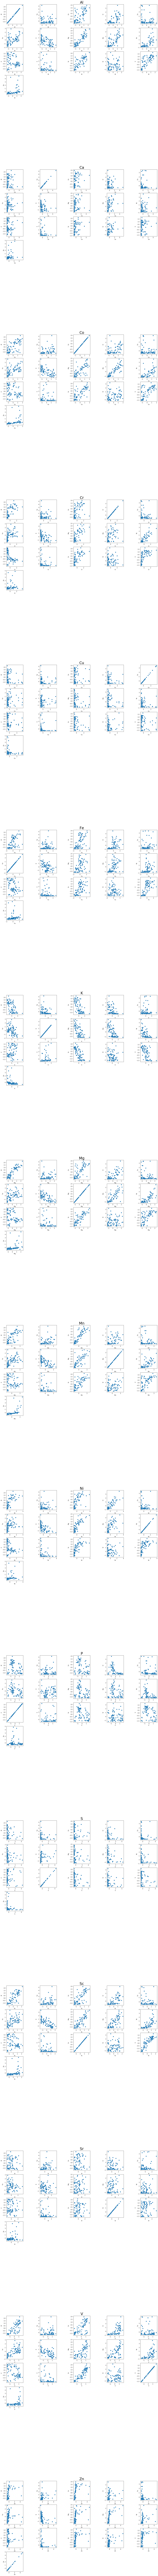

In [34]:
temp=0
m=len(datos.columns)-3
b=0

#Se definen las dimensiones del grid interior
x=6
y=5
outer_grid = gridspec.GridSpec(m,1)

#se grafica el grid exterior
for i in range(m): 
    ngrid = outer_grid[i,0]   
    plt.subplots_adjust(top = 75, right=3)    
    inner_grid = gridspec.GridSpecFromSubplotSpec(x,y, ngrid, wspace=1)

    # Se grafica el grif interior
    for j in range(x):
        if (b==1):
            b=0
            break
        for k in range(y):
            if (temp==(len(datos.columns)-3)):
                temp=0
                b=1
                break
            ax = plt.subplot(inner_grid[j,k])
            
            ax.scatter(datosnor[datos.columns[i+3]],datosnor[datos.columns[temp+3]])
            plt.xlabel(datos.columns[i+3])
            plt.ylabel(datos.columns[temp+3])
            if (temp==2):
                ax.set_title(datos.columns[i+3], fontsize=30)
            temp+=1
plt.show()


<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 14. Scatter plot de elementos contra elementos</p>

<p>Analizando el gráfico anterior podemos obtener una primera aproximación a la correlación existente entre los datos. Dentro de las observaciones principales podemos destacar lo siguiente:
</p>
<ol>
    <li>Los elementos que presentan mayor correlación con otros elementos son: Al, Co, Fe, Mg, Mn, Ni y Sc. Siendo los principales Al, Mn y Mg
    </li>
    <li>Los elementos que presentan menor correlación con otros elementos son: Ca, Cr, Cu, K, P, S, Sr. Siendo los principales K y P</li>
    <li>Elementos como el Cu, P y Sr no presentan ninguna correlación con otros elementos</li>
    <li>El elemento K presenta correclaciones negativas en la mayoría de los casos</li>
</ol> 

<p>Sin embargo, las conclusiones mencionadas anteriormente son únicamente las observaciones percibidas al observar la gráfica. Debido a ello, es necesario determinar valores específicos en cada caso. Esto puede realizarse por medio del cálculo de las matrices de covarianza y correlación
</p>

# Matriz de covarianza <a name='Mcov'/>

<p>Para el cálculo de la matriz de covarianza se realizó el cálculo excluyendo las tres primeras columnas correspondientes a
coordenadas este, coordenadas norte y el peso de las muestras
</p>

In [35]:
#Se calcula la matriz de covarianza
mcov=datosnor.drop(columns=datosnor.columns[0:3], axis=1).cov()
mcov

,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
Al,1.000000,-0.009584,0.700752,0.688654,-0.184098,0.535382,-0.603281,0.914588,0.746716,0.739213,-0.364677,-0.170005,0.814932,0.071028,0.777716,0.387752
Ca,-0.009584,1.000000,0.408500,0.032259,0.000076,0.054239,-0.296143,0.161397,0.427458,0.200908,-0.057399,-0.051459,0.349757,0.415623,0.197733,0.329626
Co,0.700752,0.408500,1.000000,0.500780,-0.055038,0.512521,-0.641043,0.763399,0.894268,0.686629,-0.365085,-0.092047,0.773096,0.169552,0.663249,0.462747
Cr,0.688654,0.032259,0.500780,1.000000,-0.086608,0.409009,-0.478470,0.720525,0.443098,0.857589,-0.549283,-0.176265,0.703535,-0.009582,0.656541,0.208787
Cu,-0.184098,0.000076,-0.055038,-0.086608,1.000000,0.117543,0.050792,-0.189134,-0.166005,-0.093689,-0.170905,-0.034958,-0.205959,0.108863,-0.178633,-0.140585
Fe,0.535382,0.054239,0.512521,0.409009,0.117543,1.000000,-0.451225,0.377934,0.474967,0.340826,-0.363667,-0.152516,0.506711,-0.081127,0.662761,0.051180
K,-0.603281,-0.296143,-0.641043,-0.478470,0.050792,-0.451225,1.000000,-0.646233,-0.659757,-0.576156,0.177471,0.237180,-0.710909,-0.151509,-0.629039,-0.379125
Mg,0.914588,0.161397,0.763399,0.720525,-0.189134,0.377934,-0.646233,1.000000,0.787779,0.828014,-0.369545,-0.069822,0.843472,0.128553,0.724221,0.461989
Mn,0.746716,0.427458,0.894268,0.443098,-0.166005,0.474967,-0.659757,0.787779,1.000000,0.632818,-0.266993,-0.180060,0.778836,0.266207,0.692412,0.653757
Ni,0.739213,0.200908,0.686629,0.857589,-0.093689,0.340826,-0.576156,0.828014,0.632818,1.000000,-0.454138,-0.193527,0.749251,0.130333,0.653348,0.401977


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 8. Matriz de covarianza</p>

# Matriz de correlación <a name='Mcorr'/>

<p>De manera similar al caso anterior, para el cálculo se excluyeron las tres primeras columnas correspondientes a
coordenadas este, coordenadas norte y el peso de las muestras
</p>

In [36]:
#Se calcula la matriz de correlación
mcor=datosnor.drop(columns=datosnor.columns[0:3], axis=1).corr()
mcor

,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn
Al,1.000000,-0.009584,0.700752,0.688654,-0.184098,0.535382,-0.603281,0.914588,0.746716,0.739213,-0.364677,-0.170005,0.814932,0.071028,0.777716,0.387752
Ca,-0.009584,1.000000,0.408500,0.032259,0.000076,0.054239,-0.296143,0.161397,0.427458,0.200908,-0.057399,-0.051459,0.349757,0.415623,0.197733,0.329626
Co,0.700752,0.408500,1.000000,0.500780,-0.055038,0.512521,-0.641043,0.763399,0.894268,0.686629,-0.365085,-0.092047,0.773096,0.169552,0.663249,0.462747
Cr,0.688654,0.032259,0.500780,1.000000,-0.086608,0.409009,-0.478470,0.720525,0.443098,0.857589,-0.549283,-0.176265,0.703535,-0.009582,0.656541,0.208787
Cu,-0.184098,0.000076,-0.055038,-0.086608,1.000000,0.117543,0.050792,-0.189134,-0.166005,-0.093689,-0.170905,-0.034958,-0.205959,0.108863,-0.178633,-0.140585
Fe,0.535382,0.054239,0.512521,0.409009,0.117543,1.000000,-0.451225,0.377934,0.474967,0.340826,-0.363667,-0.152516,0.506711,-0.081127,0.662761,0.051180
K,-0.603281,-0.296143,-0.641043,-0.478470,0.050792,-0.451225,1.000000,-0.646233,-0.659757,-0.576156,0.177471,0.237180,-0.710909,-0.151509,-0.629039,-0.379125
Mg,0.914588,0.161397,0.763399,0.720525,-0.189134,0.377934,-0.646233,1.000000,0.787779,0.828014,-0.369545,-0.069822,0.843472,0.128553,0.724221,0.461989
Mn,0.746716,0.427458,0.894268,0.443098,-0.166005,0.474967,-0.659757,0.787779,1.000000,0.632818,-0.266993,-0.180060,0.778836,0.266207,0.692412,0.653757
Ni,0.739213,0.200908,0.686629,0.857589,-0.093689,0.340826,-0.576156,0.828014,0.632818,1.000000,-0.454138,-0.193527,0.749251,0.130333,0.653348,0.401977


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 9. Matriz de correlación</p>

<p>Para poder realizar una mejor interpretación de los datos obtenidos, se graficó en forma de "heatmap". De esta forma, es posible visualizar la información completa de manera objetiva.
</p>
<p>Este proceso se realizó para la matriz de covarianza y la matriz de correlación.
</p>

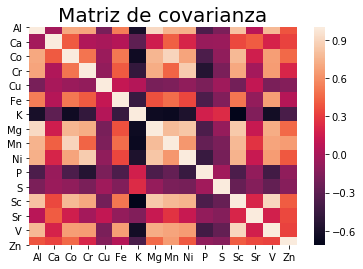

In [37]:
#Se grafica la matriz de covarianza en forma de heatmap
ax = plt.axes()
sns.heatmap(mcov, xticklabels=mcov.columns, yticklabels=mcov.columns)
ax.set_title('Matriz de covarianza', fontsize=20)
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 15. Matriz de covarianza</p>

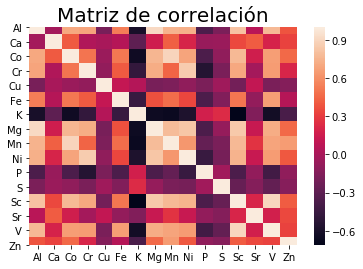

In [38]:
#Se grafica la matriz de correlación en forma de heatmap
ax = plt.axes()
sns.heatmap(mcor, xticklabels=mcor.columns, yticklabels=mcor.columns)
ax.set_title('Matriz de correlación', fontsize=20)
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 16. Matriz de correlación</p>

<p>Por otro lado, ya que se cuenta con los datos numéricos, es posible determinar de manera precisa entre qué elementos se presenta mayor correlación, covarianza, así como su valor. Por consiguiente, se optó por crear un nuevo dataframe que contuviera los valores más altos de estos parámetros
</p>

In [39]:
#Se crean los datafrmaes de correlación y covarianza
columnas=[]
for i in range (len(mcor.columns)):
    columnas.append(mcor.columns[i])
    
mcor.columns=columnas
mcov.columns=columnas  

dfcor = pd.DataFrame(columns=['Corr', 'Elemento1', 'Elemento2'])
dfcov = pd.DataFrame(columns=['Cov', 'Elemento1', 'Elemento2'])

In [40]:
#Se obtienen los elementos con mayor y menor covarianza y correlación
for i in range(len(mcor.columns)):
    va=(mcor.sort_values([mcor.columns[i]], ascending=False)[[mcor.columns[i]]].head(4)).copy()
    va['Elemento1']=mcor.columns[i]
    va['Elemento2']=va.index
    va.rename(columns={va.columns[0]:'Corr'},inplace = True)
    dfcor=dfcor.append(va)
    
    va=(mcor.sort_values([mcor.columns[i]], ascending=False)[[mcor.columns[i]]].tail(3)).copy()
    va['Elemento1']=mcor.columns[i]
    va['Elemento2']=va.index
    va.rename(columns={va.columns[0]:'Corr'},inplace = True)
    dfcor=dfcor.append(va)
    
    va=(mcor.sort_values([mcor.columns[i]], ascending=False)[[mcor.columns[i]]].head(4)).copy()
    va['Elemento1']=mcov.columns[i]
    va['Elemento2']=va.index
    va.rename(columns={va.columns[0]:'Cov'},inplace = True)
    dfcov=dfcov.append(va)
    
    va=(mcor.sort_values([mcor.columns[i]], ascending=False)[[mcor.columns[i]]].tail(3)).copy()
    va['Elemento1']=mcov.columns[i]
    va['Elemento2']=va.index
    va.rename(columns={va.columns[0]:'Cov'},inplace = True)
    dfcov=dfcov.append(va)
    
dfcor.reset_index(drop=True, inplace=True)
dfcor.drop(dfcor[dfcor[dfcor.columns[0]]==1].index, inplace=True)
dfcor.reset_index(drop=True, inplace=True)

dfcov.reset_index(drop=True, inplace=True)
dfcov.drop(dfcov[dfcov[dfcov.columns[0]]==1].index, inplace=True)
dfcov.reset_index(drop=True, inplace=True)

In [41]:
#Se mjestran los elementos con mayor y menor correlación
dfcov.sort_values(['Cov'], ascending=False).iloc[::6, :]

,Cov,Elemento1,Elemento2
0,0.914588,Al,Mg
18,0.857589,Cr,Ni
1,0.814932,Al,Sc
13,0.773096,Co,Sc
30,0.662761,Fe,V
6,0.427458,Ca,Mn
66,0.237180,S,K
38,0.050792,K,Cu
62,-0.057399,P,Ca
94,-0.140585,Zn,Cu


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 10. Elementos de mayor y menor covarianza</p>

In [42]:
#Se muestran los elementos con mayor y menor correlación
dfcor.sort_values(['Corr'], ascending=False).iloc[::6, :].tail(5)

,Corr,Elemento1,Elemento2
75,-0.262592,Sc,S
76,-0.363509,Sc,P
88,-0.411401,V,P
23,-0.549283,Cr,P
39,-0.646233,K,Mg


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 11. Elementos de mayor y menor correlación</p>

De los datos y gráficas observadas anteriormente es posible determinar una relación existente entre la presencia de los elementos contenidos en las muestras, con base en su covarianza y correlación calculadas. Dentro de las observaciones más destacables se encuentran:
- La diferencia entre la matriz de correlación y la matriz de convarianza es que la matriz de correlación se encuentra estadarizada. Debido a que se realizó una estandarización de los datos previo al cálculo, la matriz de covarianza y correlación coinciden en valores.
- Los pares de elementos que presentaron una mayor correlación son (Al  Mg), (V - Sc) y (Mn - Co). Es decir, cuando la concentración de uno de estos elementos aumenta, también lo hará la concentración del otro elemento.
- Los pares de elementos que presentaron una menor correlación son (K  Mg), (P - Cr) y (V - P). Es decir, cuando la concentración de uno de estos elementos aumenta, la concentración del otro elemento disminuye.
- El elemento que más tiende a repetirse en altas correlaciones es el Mg. Por lo que la presencia de Mg es un buen indicador de altas concentraciones de los otros elementos correlacionados, como son: Al, Mn, Sc, V y Co.
- El elemento que más tiende a repetirse en correlaciones negativas es el K. Por lo que la presencia de k es un indicador de bajas o nulas concentraciones de Mg y Mn. Además a que están correlacionadas, también se esperaría una baja concentración de los elementos anteriores.
- Otro elemento que tiende a repetirse en correlaciones negativas es el P. Asociado a bajas concentraciones de Sc, Co, V, Ni y Cr

<h1 style="text-align: center; font-size: 35px; margin-top: 150px;">Análisis espacial</h1><a name='AES'/>

In [43]:
#En caso de no contar con la biblioteca
#!pip install scikit-gstat
#Link de instalación
#https://mmaelicke.github.io/scikit-gstat/install.html

In [44]:
from skgstat import Variogram
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cluster import KMeans

# Semivariogramas <a name='Semivariograma'/>

C:\ProgramData\Anaconda3\lib\site-packages\skgstat\Variogram.py:1638: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


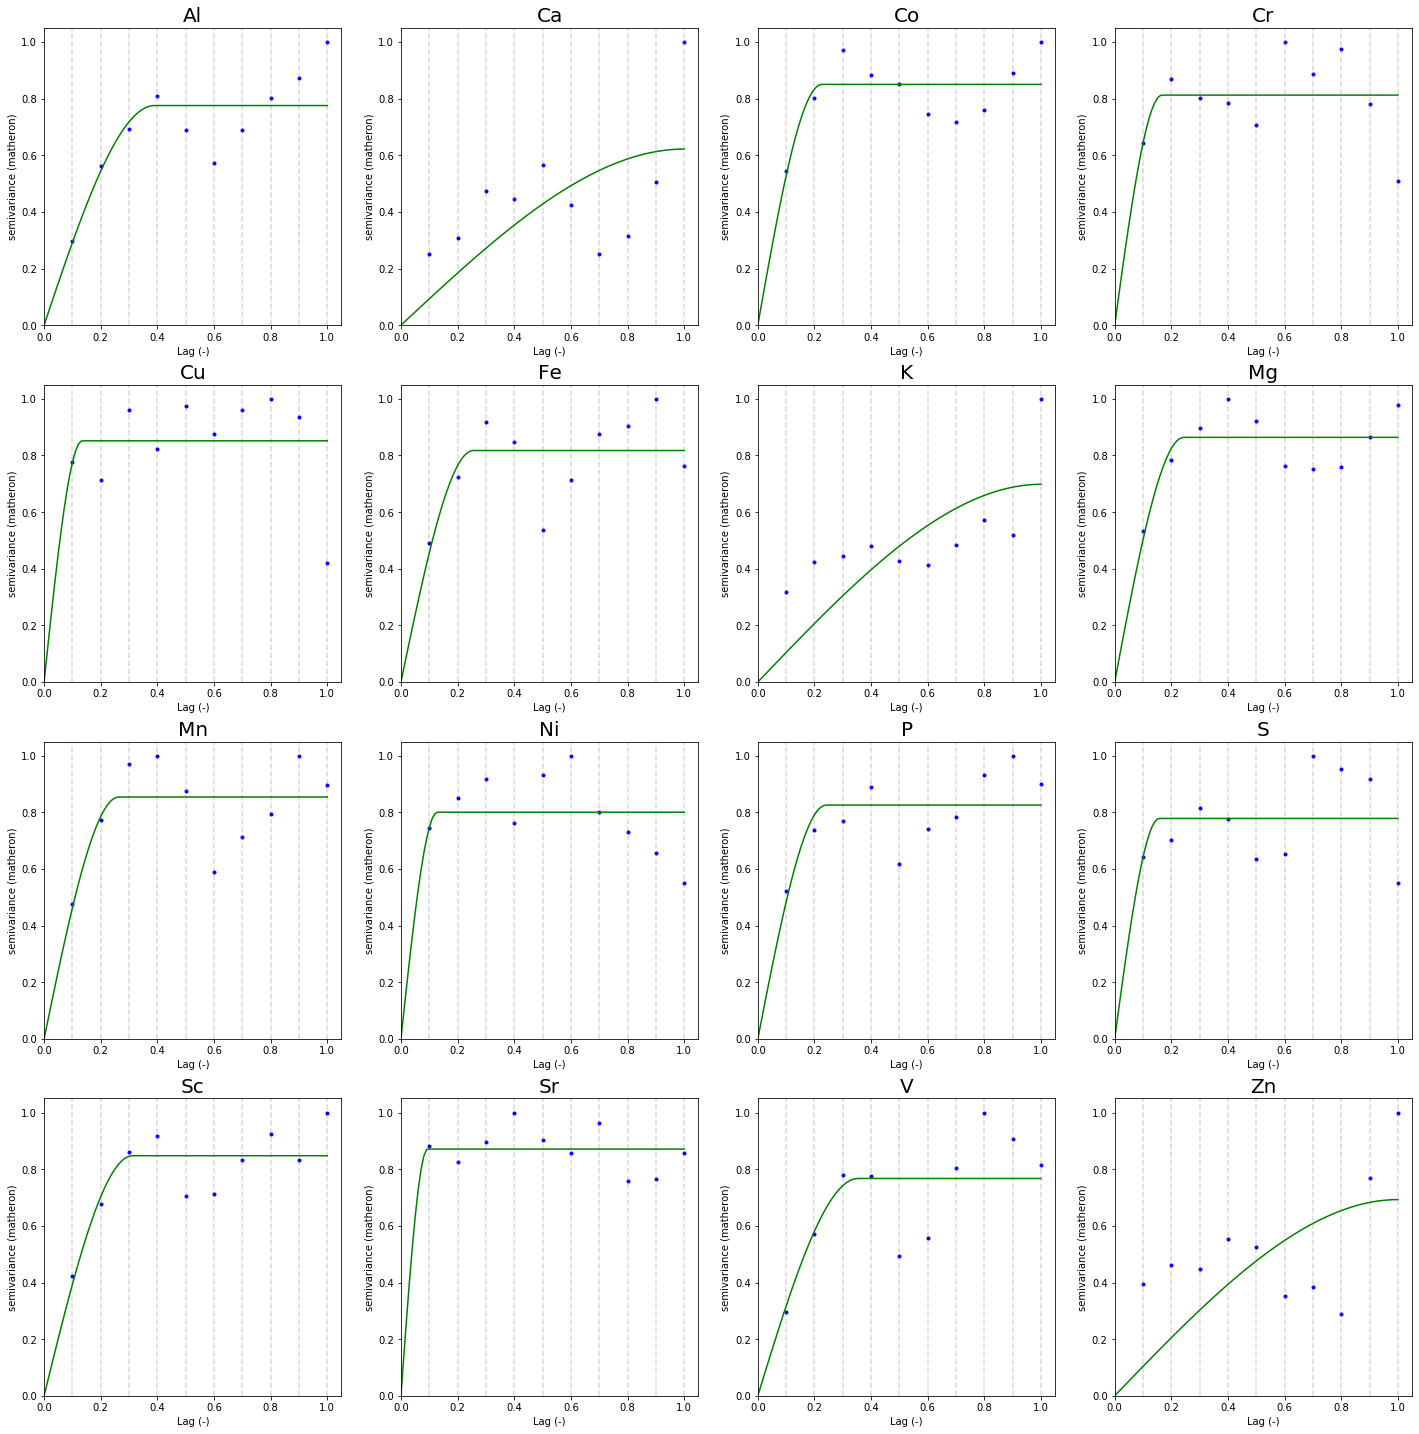

In [45]:
#Se grafican los variogramas
temp=[]
temp2=[]
temp3=[]

for i in range(len(datos['este'])):
    temp.append(datos['este'].values[i])
    temp2.append(datos['norte'].values[i])

fig, _a = plt.subplots(4, 4, figsize=(8,8))
plt.subplots_adjust(right=2.5, top = 2.5)
axes = _a.flatten()

for i in range(len(datosnor.columns)-3):
    temp3=[]
    for j in range(len(datosnor[datosnor.columns[i]])):        
        temp3.append(datosnor[datosnor.columns[i+3]].values[j])
    axes[i].set_title(datosnor.columns[i+3], fontsize=20)
    V = Variogram(coordinates=np.vstack((temp, temp2)).transpose(), values=temp3)
    V.plot(axes=axes[i], hist=False, show=True)

plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 17. Variogramas</p>

De manera general, en gráfico anterior podemos observar que la mayoría de los elementos pierden su correlación espacial muy rápido. Por lo que resulta poco probable encontrar muestras con concentraciones similares a distancias medias y largas. 
- Los elementos que pierden más rápidamente su correlación espacial son Sr, Ni, Cu y S
- Los elementos que guardan una correlación espacial a distancias medianas y largas son el Zn, K y Ca.
- Los elementos con correlaciones importantes pierden correlación espacial a distancias medianas

# Componentes Principales <a name='CP'/>

In [46]:
#Se calculan las componentes principales 
pca=PCA()
pca.fit(datosnor.drop(columns=datosnor.columns[0:3], axis=1))
pca_datos=pca.transform(datosnor.drop(columns=datosnor.columns[0:3], axis=1))

In [47]:
#Se calcula el porcentaje de información y porcentaje de información acumulada
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var_acum=np.cumsum(per_var)
labels=['PC'+str(x) for x in range(1, len(per_var)+1)]

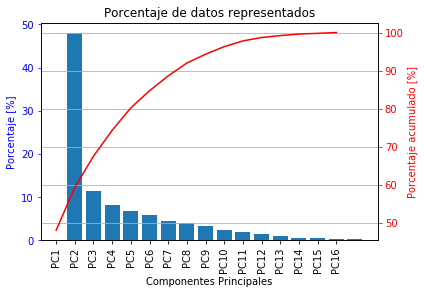

In [48]:
#Se grafican los prcentajes obtenidos anteriormente
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
ax1.set_xlabel('Componentes Principales')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Porcentaje [%]', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(labels,per_var_acum,color='r')
ax2.set_ylabel('Porcentaje acumulado [%]', color='r')
ax2.tick_params('y', colors='r')
plt.xticks(rotation='vertical')

fig.tight_layout()
plt.title('Porcentaje de datos representados')
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 18. Contenido de información en las componentes principales</p>

Podemos observar que, como era esperado, el mayor porcentaje de información se encuentra en la primera componente (cerca del 50%). Sin embargo, el porcentaje total de información se aproxima de forma lenta al 100%, por lo que para obtener un gran porcentaje de la información sería necesario abarcar numerosas componetes.

In [49]:
#Se crea un data frame de las componentes principales
pca_df=pd.DataFrame(pca_datos, index=datos.index, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.259987,-1.371718,1.716030,-0.839130,-0.671461,-1.123032,0.008988,-0.039826,0.367012,-0.034095,-0.180933,-0.693654,0.181376,-0.062544,-0.288514,-0.141234
1,3.813911,-2.010293,0.291595,-0.643573,-0.685350,-0.494142,-0.244044,0.120202,0.340137,-0.219652,0.106706,-0.189298,-0.350655,0.038171,-0.067981,-0.354574
2,-1.370037,1.400552,3.295659,-0.228697,1.176470,-0.428771,1.247583,-1.556516,0.119820,-0.189173,0.476634,-0.040070,-0.474474,-0.388780,-0.112417,-0.228781
3,-0.906562,-1.648617,0.898269,-0.229162,0.806615,1.053126,0.620034,0.733797,0.958076,0.205908,0.096714,-0.198724,-0.347740,-0.034267,-0.178263,0.038650
4,-1.963021,2.258416,1.662563,-0.211428,0.784855,0.477740,-0.964390,-1.259635,0.674855,-0.552977,-0.165276,-0.604685,-0.185193,0.264874,0.359657,-0.032584


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 12. Set de valores de componentes principales</p>

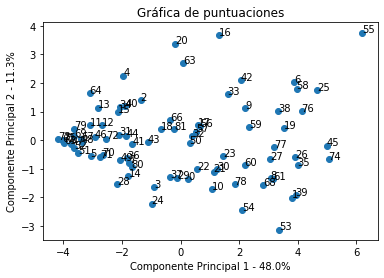

In [50]:
#Se realiza la gráfica de puntuaciones
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Componente Principal 1 - {0}%'.format(per_var[0]))
plt.ylabel('Componente Principal 2 - {0}%'.format(per_var[1]))

for muestra in pca_df.index:
    plt.annotate(muestra, (pca_df.PC1.loc[muestra], pca_df.PC2.loc[muestra]))

plt.title('Gráfica de puntuaciones')
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 19.Gráfica de puntuaciones</p>

Dentro del gráfico de puntuaciones no es posible determinar agrupaciones específicas. Sin embargo, es posible inferir la existencia de dos o tres agrupaciones principales dentro del set de datos. Para concluir sobre las agrupaciones necesarias, se realizará una gráfica de codo.

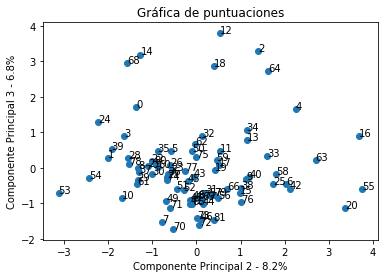

In [51]:
#Se realiza la gráfica de puntuaciones
plt.scatter(pca_df.PC2,pca_df.PC3)
plt.xlabel('Componente Principal 2 - {0}%'.format(per_var[2]))
plt.ylabel('Componente Principal 3 - {0}%'.format(per_var[3]))

for muestra in pca_df.index:
    plt.annotate(muestra, (pca_df.PC2.loc[muestra], pca_df.PC3.loc[muestra]))

plt.title('Gráfica de puntuaciones')
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 20.Gráfica de puntuaciones</p>

Una vez que graficamos la segunda y tercer componente en la gráfica de puntuaciones, observamos una segunda agrupación correspondiente probablemente a un segundo posible tipo de dato que presenta caracterísiticas similares. Se observa que la presencia de puntos en una agrupación aparece fuera de la agrupación en el otro gráfico. Algunos ejemplos de esto son:
- Punto 12
- Punto 59
- Punto 13

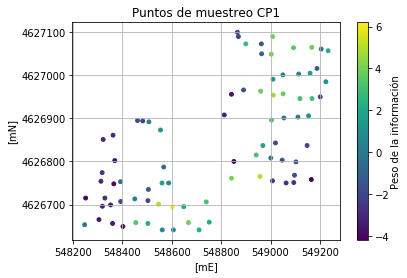

In [52]:
#Se realiza una representación de la primera componente principal en el muestreo de datos
marker_size=15
plt.scatter(datos['este'], datos['norte'], marker_size, c=pca_df.PC1)
plt.title("Puntos de muestreo CP1")
plt.xlabel("[mE]")
plt.ylabel("[mN]")
cbar= plt.colorbar()
cbar.set_label("Peso de la información", labelpad=+1)
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 21. Primera componente proyectada en los puntos de muestreo</p>

Dentro de los puntos graficados junto con la primera componente principal asociada podemos observar que existe una tendencia de los valores con mayor magnitud de contenido de información. La tendencia descrita corresponde a una dirección de (SW - NE), en las partes centrales de las agrupaciones de puntos, estando rodeadas por puntos con menor contenido de información.

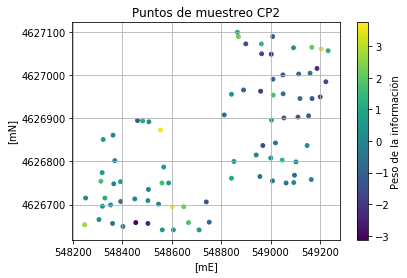

In [53]:
#Se realiza una representación de la segunda componente principal en el muestreo de datos
marker_size=15
plt.scatter(datos['este'], datos['norte'], marker_size, c=pca_df.PC2)
plt.title("Puntos de muestreo CP2")
plt.xlabel("[mE]")
plt.ylabel("[mN]")
cbar= plt.colorbar()
cbar.set_label("Peso de la información", labelpad=+1)
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 22. Segunda componente proyectada en los puntos de muestreo</p>

Para el caso de la segunda componente principal, considerando que el orden de magnitud presente es la mitad de la obtenida en la primera componente principal, se observa una mayor dispersión de los valores, sin presentar una tendencia o agrupación característica.

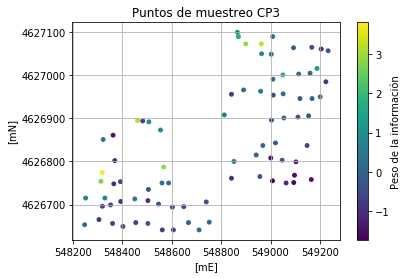

In [54]:
#Se realiza una representación de la segunda componente principal en el muestreo de datos
marker_size=15
plt.scatter(datos['este'], datos['norte'], marker_size, c=pca_df.PC3)
plt.title("Puntos de muestreo CP3")
plt.xlabel("[mE]")
plt.ylabel("[mN]")
cbar= plt.colorbar()
cbar.set_label("Peso de la información", labelpad=+1)
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 23. Tercera componente proyectada en los puntos de muestreo</p>

En general, observamos que los valores altos dentro de la  primera componente principal abarca los valores centrales , mientras que los valores altos en la segunda y tercera componente se presentan en las zonas circundantes de las obtenidas en la primera compoente principal.

# Clustering <a name='clust'/>

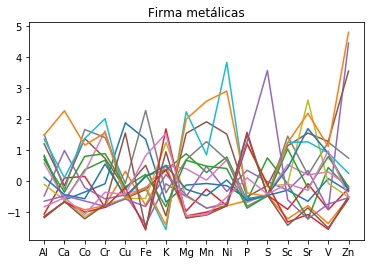

In [55]:
#Se grafican las firmas metálicas leídas (cada 5 muestras)
for j in range(len(datos)):
    temp=[]
    for i in range(len(datos.columns)-3):
        temp.append(datosnor[datosnor.columns[i+3]][j])
    #Se grafican las firmas minerales
    if (j%5==0):
        plt.plot(datos.columns[3:],temp)
                 
plt.title('Firma metálicas')
plt.show()        

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 24. Firmas metálicas del estudio</p>

In [56]:
#Se obtiene un arreglo de datos del dataframe de datos normalizados
X=np.array(datosnor[datosnor.columns[3:]])

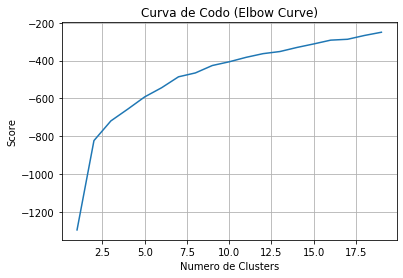

In [57]:
#Se obtiene la gráfica de codo para determinar el número de clusters necesarios
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Curva de Codo (Elbow Curve)')
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 25. Curva de codo</p>

En la curva de codo obtenida no resulta fácilmente identificable el codo de la gráfica. Debido a que hay una disminución gradual de la pendiente, el último cambio destacable de pendiente resulta en un número de clusters de dos. No obstante, se realizaron pruebas variando el número de clusters para ver diferentes aproximaciones.
En cada una de las aproximaciones con diferente número de clusters, se calcula la suma del error medio cuadrático en el modelo calculado y las muestras. Dicha suma se utilizó como indicador para ver las variaciones de las aproximaciones. Se observó que:
- Con dos clusters el error total acumulado es de aproximadamente 63
- Con tres clusters el error total acumulado es de aproximadamente 59
- Con cuatro clusters el error total acumulado es de aproximadamente 57
- Con cinco clusters el error total acumulado es de aproximadamente 54.5
- Con seis clusters el error total acumulado es de aproximadamente 52.5

Por lo que se decidión utilizar 2 clusters, ya que apartir de ese punto la disminución del error no es significativa

In [58]:
#Se ajusta el número de clusters con la información del dataframe
kmeans = KMeans(n_clusters=3).fit(X)
centroides = kmeans.cluster_centers_
print('Centroides:\n',centroides)

Centroides:
 [[-0.03735576  0.17248574  0.05734057 -0.11454178  0.06740466  0.67685877
  -0.06337615 -0.20447575  0.04283299 -0.17322004 -0.05310738 -0.17492688
   0.10070703 -0.12867983  0.43748458 -0.2602612 ]
 [ 1.14455078  0.23288422  1.08764316  1.11132807 -0.14070416  0.51136767
  -0.92456752  1.24178843  1.05281317  1.16495248 -0.63724462 -0.27426257
   1.18220405  0.18959629  0.96619294  0.65213321]
 [-0.81631138 -0.28791993 -0.83852683 -0.73966885  0.05786167 -0.83388069
   0.72270116 -0.7747579  -0.80310259 -0.73940444  0.5044878   0.31999654
  -0.93739303 -0.05236092 -1.00638144 -0.30345067]]


<function matplotlib.pyplot.show(*args, **kw)>

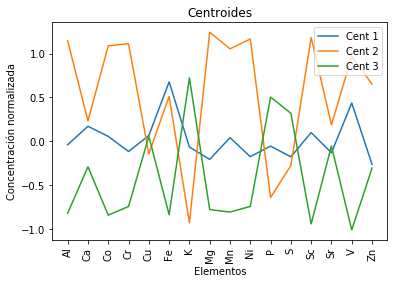

In [59]:
#Se grafican los centroides obtenidos
for i in range(len(centroides)):
    plt.plot(datos.columns[3:],centroides[i], label='Cent '+str(i+1))
plt.title('Centroides')
plt.xlabel("Elementos")
plt.ylabel("Concentración normalizada")
plt.xticks(rotation='vertical')
plt.legend()
plt.show

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 26.Centroides de las concentraciones minerales</p>

Se obtuvieron dos comportamientos típicos de concentraciones de elementos (centroides) que describen mayormente el comportamiento de las muestras realizadas. Dicho comportamiento se atibuye a que la población de los datos se puede clasificar en 2 grupos que comparten características similares. La agrupación de los datos se define por el contenido de elementos y su proporción, esto podría ser causado por dos razones: 
- Variaciones litológicas
- Alteraciones mineralógicas
Debido a que se realizó una divisón en dos grupos principales, y que resultan composiciones químicas completamente diferentes, se define a las agrupaciones como litologías diferentes. Se realizaron pruebas con mayor número de centroides calculados. Sin embargo, al proyectarlos en el mapa la distribución de los datos resultaba con una gran dispersión.

In [60]:
# Se obtiene una predicción del modelo por cada muestra
labels = kmeans.predict(X)

In [61]:
#Se calcula el error acumulado del ajuste realizado
errortot=0
for i in range(len(labels)):
    rms = sqrt(mean_squared_error(X[i,:], centroides[labels[i]]))
    errortot+=rms
errortot

57.256894072043934

In [62]:
#Se agrega la clasificación realizada al dataframe original
datos['Centroide'] = pd.Series(labels, index=datos.index)

In [63]:
datos.head()

,norte,este,Recvd Wt.,Al,Ca,Co,Cr,Cu,Fe,K,Mg,Mn,Ni,P,S,Sc,Sr,V,Zn,Centroide
0,4627001.0,549050.0,2.78,3.71,0.09,13.0,26.0,6040.0,10.20,0.07,1.65,1700.0,8.0,220.0,0.03,12.0,11.0,155.0,139.0,0
1,4627049.0,549003.0,3.32,5.13,0.02,32.0,77.0,2180.0,11.35,0.01,3.42,3650.0,20.0,160.0,0.01,28.0,5.0,240.0,280.0,1
2,4627073.0,548963.0,2.76,1.39,0.61,7.0,21.0,7480.0,6.62,0.12,0.33,1475.0,2.0,230.0,0.07,8.0,67.0,105.0,44.0,2
3,4627050.0,548964.0,3.20,1.74,0.14,2.0,60.0,1030.0,8.41,0.14,0.40,148.0,5.0,70.0,0.07,11.0,16.0,165.0,48.0,0
4,4627090.0,548870.0,3.42,0.23,2.41,4.0,6.0,4530.0,3.62,0.06,1.16,286.0,2.0,360.0,0.04,12.0,46.0,26.0,58.0,2


<p style="text-align: center;font-size: 10px;font-style: oblique;">Tabla 13. Set de datos final con clasificación</p>

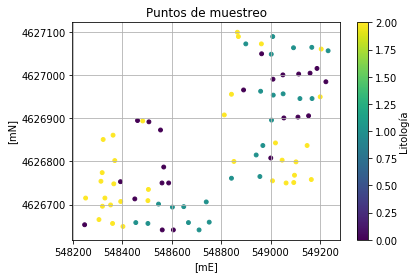

In [64]:
#Se muestra la clasificación realizada en un mapa espacial de las muestras
marker_size=15
plt.scatter(datos['este'], datos['norte'], marker_size, c=datos.Centroide)
plt.title("Puntos de muestreo")
plt.xlabel("[mE]")
plt.ylabel("[mN]")
cbar= plt.colorbar()
cbar.set_label("Litología", labelpad=+1)
plt.grid()
plt.show()

<p style="text-align: center;font-size: 10px;font-style: oblique;">Figura 24. División litológica de acuerdo a la clasificación realizada</p>

Finalmente, en la última gráfica podemos observar una clasificación de cada punto muestreado con base en las concentraciones de cada elementos químico que la compone. Como ya se había mencionado, se atribuye la diferencia de características a variaciones litológicas. Asumiendo que es el caso, como en mucho resultados anteriores, se obtiene un eje principal en dirección SW - NE, en el que en los valores centrales corresponden a una misma litología, mientras que los valores exteriores correspnden otra.

In [65]:
datos.to_csv('datosCompletos.csv')

In [66]:
datos[['este', 'norte', 'Centroide']].to_csv('datos1.csv')

<h1 style="text-align: center; font-size: 35px; margin-top: 150px;">Conclusiones</h1><a name='conc'/>

Se clasificó el set de datos limpios en dos agrupaciones de datos principales que compartían características similares. Se deduce que la diferencia entre clases obtenidas puede estar asociada a dos variaciones principales: Variación litológica y alteraciones hidrotermales. Sin embargo, debido a que la variación de concentraciones de elementos resulta completamente opuesta la una de la otra (Figura 26), se concluye que las agrupaciones de datos son representativos de dos litologías diferentes. A su vez, la división en dos grupos principales es comprobado por las gráficas de puntuaciones realizadas, donde dentro de las componentes principales se observan dos aglomeraciones (Figuras 19 y 20).
Ahora bien, una vez definido que se trata de dos litologías el paso siguiente consiste en determinar a que litología corresponde cada grupo asociandolo a una explicación geológica de acuerdo a los resultados obtenidos. Dentro de lo estudiado, se realizaron 3 posibles explicaciones de los datos:
<ol>
<li>Intrusión de cuerpo máfico:</li>
    De acuerdo a lo observado en las firmas metálicas parámetro (Centroides) se observa que la composición química de las litologías presentes corresponden a composiciones químicas opuestas. Centrándonos en los elementos de minerales formadores de roca, por un lado, una litología presenta alto contenido de elementos como Mg, Fe y Ca, característicos de rocas máficas en la Serie de reacciones de Bowen, así como valores bajos de K. Por el contrario, en la otra litología se obtienen concentraciones inversas a las anteriores, por lo que corresponde al comportamiento de una roca félsica. La relación anterior es descrita por los valores de correlación obtenidos, principalmente en las correlaciones asociada a K, como es el caso de (K - Mg).
    Ahora, analizando la distribución espacial de los datos (Figura 24), se observa que la ubicación de la curva metálica correspondiente a altas concentraciones de M y Fe se encuentra inmersa en la segundo litología (altas concentraciones de K), por lo que se infiere una intrusión de un cuerpo ígneo de composicón máfica entre una roca ígnea de composición félsica. Debido a que se asume una intrusión, la roca ígnea que intruye debería corresponder a una roca intrusiva, mientras que la otra litología correpondería a una roca extrusiva. Tomando lo anterior en consideración, se concluye que una posible explicación a los datos observados sería la intrusión de una roca máfica intrusiva (Gabro) en una roca félsica extrusiva preexistente (Riolita).
<li>Pórfido cuprífero:</li>
    Otra posible explicación podría estar asociado a un yacimiento mineralógico tipo Pórfido Cuprífero. En el cual se esperaría obtener altos valores de concentraciones de Cu, S, Fe, W y Sn. De acuerdo a los elementos muestreados cumple con las condiciones ya que se tiene una firma metálica con altos valores de Cu, S y Fe. Además de presentar normalmente una roca encajonante félsica, lo cual también coincidiría de acuerdo a lo mencionado en la explicación anterior (Figura 24). Cabe mencionar que los pórfido cupríferos son depósitos minerales de gran tonelaje y de baja ley, esto explicaría las concentraciones de concentración regular encontradas, pero constante en ambos grupos clasificados.
<li>Depósito tipo skarn:</li>
    En esta explicación, se entiende que corresponde a un depósito mineral constituido por silicatos de Ca, Mg y Fe derivados de un protolito de calizas y dolomitas en las cuales se ha introducido metasomáticamente grandes cantidades de Si, Al, Fe y Mg, los cuales corresponden con las altas concentraciones observadas de estos elementos.
</ol>
No obstante, la posibles explicaciones presentan aspectos no correspondientes a los valores esperados. Por lo que se realiza una elección de modelo por descarte. 
En el caso de la posible explicación 2 (Pórfido de Cobre) se descarta debido a que no corresponde la geometría, en un pórfido de este tipo, el depósito tiene una forma esférica característica, debido a que se observa una tendencia rasgada (Elipse SW - NE) no se cumplen con las caracteríticas del modelo. Por otro lado, debería existir una mayor cantidad de zonas de alteración asocidas, al momento intentar mapear dichas alteraciones con una mayor cantidad de clusters, no se observó una tendencia de cículos clasificados, sino una dispersión irregular de los datos.
También se descarta la opción del skarn debido a que no se observan las altas concentraciones de Ca esperadas (debido a que está conformado dentro de secuencias calcáreas)en la litología esperada, sino que los valores de altas concentraciones de Ca se encuentra presentes en la otra curva. Otro aspecto de descarte, es que la otra litología no corresponde a las concentraciones esperadas, pero sobretodo, debería existir una tendencia más clara de la formación de 3 agrupaciones (cuerpo intrusivo, skarn, roca calcárea), la cual no fue observada. Finalmente, se concluye que la explicación más aproximada es la primera opción.
